In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Global Suicide Analysis, German Methods, and Predictive Model for Text Messages


## Table of content:

1. Introduction

2. Suicide data - world overview<br>
2.1 Data acquisition and Data familiarisation<br>
2.2 Data tidying and cleaning<br>
2.3 Data visualization<br>
&emsp;2.3.1 Male vs Female<br>
&emsp;2.3.2 Suicides per country<br>
&emsp;2.3.3 Year distribution<br>

3. Suicide data - focus on Germany<br>
3.1 Data acquisition and Data familiarisation<br>
3.2 Data tidying and cleaning<br>
3.3 Data visualization<br>
&emsp;3.3.1 Male vs Female<br>
&emsp;3.3.2 Age group distribution<br>
&emsp;3.3.3 Generation<br>

4. West Germany Suicide<br>
4.1 Data acquisition and Data familiarisation<br>
4.2 Data tidying and cleaning<br>
4.3 Data visualization<br>
&emsp;4.3.1 Suicide method distribution<br>
&emsp;4.3.2 Age group distribution<br>

5. Suicide detection per text message<br>
5.1 Data acquisition and Data familiarisation<br>
5.2 Data tidying and cleaning<br>

6. Modeling<br>
6.1 Model training<br>
6.2 Model results<br>

7. Limitations and further improvements<br>


### 1. Introduction

Suicide is a complex issue that can be influenced by many factors like mental health, life circumstances and societal pressures. According to the ([World Health Organization (WHO)](https://www.who.int/news/item/09-09-2019-suicide-one-person-dies-every-40-seconds)) the official statistics looks disturbing: "One person dies every 40 seconds" by comitting suicide. Furthermore, the most affected age group is young people, especially young men.<br>
My aim in this project will be to analyse the potential reasons behind this behaviour and to find out what method do the people mostly use. Examining the methods used in suicide can provide important information for prevention. Additionally, I intend to construct a predictive model to assess an individual's vulnerability to suicide, based on a text message. By combining the analyse of the methods and the predictive model, I can contribute to strategies aimed at identifying and assisting people at risk.<br>
In this project, I will use three different datasets to collect the needed information. The first dataset sheds light on the suicides in the whole world containing data for many countries for many years. The second dataset focuses on the methods used in Germany for comitting suicide. The third dataset consists of text messages and an outcome whether a suicide was committed after the message. This dataset will be my base for the predictive model.

**sources:**<br>
https://www.who.int/news/item/09-09-2019-suicide-one-person-dies-every-40-seconds<br>
https://save.org/about-suicide/suicide-statistics/

### 2. Suicide data - world overview

#### 2.1 Data acquisition and Data familiarisation

I will start with a dataset that contains data about committed suicides in each country for the period of 32 years (from 1985 to 2016). Let's  first read the dataset and check some basic information about it (like shape, columns and what they show, type of the records in the columns etc.)

In [3]:
suicide_data_world = pd.read_csv("data/Suicide World.csv")

Ok, lets first visualize the first 10 rows of the dataset to get some overview:

In [4]:
suicide_data_world.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


Before I start, I want to give some more information about the columns:<br>
```country``` -> country where the suicides were committed<br>
```year``` -> year when the suicides were committed<br>
```sex``` -> sex of suicide victims<br>
```age``` -> age group of the suicide victims<br>
```suicides_no``` -> number of suicide victims<br>
```population``` -> population of the country<br>
```suicides/100k pop``` -> rate of suicides per 100 000 population<br>
```country-year``` -> concatenation of the country and the year<br>
```HDI for year``` -> human development index ([Wikipedia](https://en.wikipedia.org/wiki/Human_Development_Index))<br>
```gdp_for_year ($)``` -> GDP for the country in this specific year<br>
```gdp_per_capita ($)``` -> GDP per capita in this specific year<br>
```generation``` -> Generation of the suicide victims<br>

It looks good, now I want to check the shape, the names of the columns and the types of the data in them:

In [5]:
suicide_data_world.shape

(27820, 12)

In [6]:
suicide_data_world.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
suicide_data_world.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

Most of the column names are ok, but I will need to rename some of them:<br>
```suicides/100k pop``` -> ```suicides_per_100k```<br>
```country-year``` -> ```country_year``` <br>
```HDI for year``` -> ```hdi_for_year```<br>
``` gdp_for_year ($) ``` -> ```gdp_for_year_usd``` <br>
```gdp_per_capita ($)``` -> ```gdp_per_capita_usd```<br>

The types of the records in the columns look pretty fine and for now I will leave it as it is, but when I prepare the data for modelling, I will need to make some adjustments. For example, I can see that the year column is of type integer, but thats fine, because I do not have exact datetime for every row and I would not focus on that.<br>
Ok, now I will rename the columns as described above and check whether the changes applied:

In [8]:
suicide_data_world.rename(columns = {
    "suicides/100k pop":"suicides_per_100k", "country-year":"country_year", 
    "HDI for year":"hdi_for_year", " gdp_for_year ($) ":"gdp_for_year_usd", 
    "gdp_per_capita ($)":"gdp_per_capita_usd"}, inplace = True)

In [9]:
suicide_data_world.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100k', 'country_year', 'hdi_for_year', 'gdp_for_year_usd',
       'gdp_per_capita_usd', 'generation'],
      dtype='object')

Now it looks much better. Another think to check would be whether all the countries are in the dataset or there are some missing countries.

In [10]:
suicide_data_world.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

Well, I can see, that a lot of countries are missing in this dataset like for example China, Bangladesh, India etc. In fact, the data is just not in the dataset, but it is available in ([Wikipedia](https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate)) and has been collected by World Health Organization. However,  it must be said that our dataset will not be complete and objective for this work.

Lets see how I can clean the available data.

#### 2.2 Data tidying and cleaning

Ok, now I will need to check the values in the columns to get an overview, whether there are missing values and eventually to replace/remove them.

In [11]:
#suicide_data_world.isna().any()
suicide_data_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides_per_100k   27820 non-null  float64
 7   country_year        27820 non-null  object 
 8   hdi_for_year        8364 non-null   float64
 9   gdp_for_year_usd    27820 non-null  object 
 10  gdp_per_capita_usd  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


That's perfect, only 1 column has missing values - the ```hdi_for_year``` column. Lets see the unique values in the column:

In [12]:
suicide_data_world.hdi_for_year.unique()

array([  nan, 0.619, 0.656, 0.695, 0.722, 0.781, 0.783, 0.694, 0.705,
       0.731, 0.762, 0.775, 0.811, 0.818, 0.831, 0.833, 0.836, 0.632,
       0.605, 0.648, 0.721, 0.723, 0.728, 0.733, 0.865, 0.882, 0.898,
       0.927, 0.93 , 0.932, 0.933, 0.935, 0.764, 0.794, 0.815, 0.853,
       0.879, 0.881, 0.884, 0.885, 0.609, 0.64 , 0.778, 0.78 , 0.774,
       0.786, 0.727, 0.816, 0.819, 0.817, 0.821, 0.824, 0.7  , 0.716,
       0.753, 0.765, 0.793, 0.785, 0.683, 0.796, 0.798, 0.806, 0.851,
       0.874, 0.866, 0.883, 0.886, 0.889, 0.888, 0.89 , 0.644, 0.664,
       0.701, 0.71 , 0.711, 0.715, 0.724, 0.576, 0.608, 0.702, 0.737,
       0.742, 0.746, 0.752, 0.755, 0.686, 0.696, 0.713, 0.749, 0.773,
       0.779, 0.782, 0.827, 0.849, 0.861, 0.867, 0.892, 0.903, 0.909,
       0.91 , 0.912, 0.654, 0.699, 0.788, 0.814, 0.83 , 0.832, 0.573,
       0.596, 0.629, 0.679, 0.706, 0.718, 0.72 , 0.623, 0.652, 0.682,
       0.704, 0.75 , 0.756, 0.761, 0.766, 0.807, 0.653, 0.685, 0.73 ,
       0.776, 0.772,

Looks like the numbers are unique or at least most of them. This was expected, because the HDI for the country is calculated by a complex formula consisting many factors (lifespan, education, GDP) and every country is different and every year the numbers used in the formula are changing.

In [13]:
suicide_data_world[suicide_data_world["hdi_for_year"]==suicide_data_world.hdi_for_year.max()]

,country,year,sex,age,suicides_no,population,suicides_per_100k,country_year,hdi_for_year,gdp_for_year_usd,gdp_per_capita_usd,generation
18204,Norway,2014,male,75+ years,33,143089,23.06,Norway2014,0.944,"499,338,534,779",103443,Silent
18205,Norway,2014,male,55-74 years,110,532578,20.65,Norway2014,0.944,"499,338,534,779",103443,Boomers
18206,Norway,2014,male,35-54 years,147,732244,20.08,Norway2014,0.944,"499,338,534,779",103443,Generation X
18207,Norway,2014,male,25-34 years,71,353943,20.06,Norway2014,0.944,"499,338,534,779",103443,Millenials
18208,Norway,2014,male,15-24 years,38,344245,11.04,Norway2014,0.944,"499,338,534,779",103443,Millenials
18209,Norway,2014,female,55-74 years,51,533630,9.56,Norway2014,0.944,"499,338,534,779",103443,Boomers
18210,Norway,2014,female,35-54 years,51,688993,7.40,Norway2014,0.944,"499,338,534,779",103443,Generation X
18211,Norway,2014,female,25-34 years,20,337592,5.92,Norway2014,0.944,"499,338,534,779",103443,Millenials
18212,Norway,2014,female,15-24 years,17,325164,5.23,Norway2014,0.944,"499,338,534,779",103443,Millenials
18213,Norway,2014,female,75+ years,7,214335,3.27,Norway2014,0.944,"499,338,534,779",103443,Silent


This was also expected, because Norway was the winner in the HDI ranking many times (from 2001 to 2004 and then from 2007 to 2019). Well, this is a nice insigt. Norway is known for relatively high cases of depression, lack of sunlight etc. Yes, it is true that Norway has one of the highest GDP per capita in the world and very good education, but I did not expect that Norway will have a life expectancy of over 82 years ([according to WHO](https://data.who.int/countries/578)).<br>
On the other side, the Norwegians have an easy access to salmon (Omega-3 fatty acids) so their diet is very healthy, combined with the active daily routing and robust healthcare system, the high life expectancy is not a surprise anymore.

In [14]:
suicide_data_world[suicide_data_world["hdi_for_year"]==suicide_data_world.hdi_for_year.min()]

,country,year,sex,age,suicides_no,population,suicides_per_100k,country_year,hdi_for_year,gdp_for_year_usd,gdp_per_capita_usd,generation
10752,Guatemala,1990,male,75+ years,4,41850,9.56,Guatemala1990,0.483,"7,650,125,217",996,G.I. Generation
10753,Guatemala,1990,male,25-34 years,45,555151,8.11,Guatemala1990,0.483,"7,650,125,217",996,Boomers
10754,Guatemala,1990,male,35-54 years,37,628848,5.88,Guatemala1990,0.483,"7,650,125,217",996,Silent
10755,Guatemala,1990,male,15-24 years,34,905373,3.76,Guatemala1990,0.483,"7,650,125,217",996,Generation X
10756,Guatemala,1990,male,55-74 years,9,311351,2.89,Guatemala1990,0.483,"7,650,125,217",996,G.I. Generation
10757,Guatemala,1990,female,35-54 years,8,684099,1.17,Guatemala1990,0.483,"7,650,125,217",996,Silent
10758,Guatemala,1990,female,15-24 years,10,915256,1.09,Guatemala1990,0.483,"7,650,125,217",996,Generation X
10759,Guatemala,1990,female,25-34 years,6,603010,1.00,Guatemala1990,0.483,"7,650,125,217",996,Boomers
10760,Guatemala,1990,female,55-74 years,1,322429,0.31,Guatemala1990,0.483,"7,650,125,217",996,G.I. Generation
10761,Guatemala,1990,female,5-14 years,2,1312953,0.15,Guatemala1990,0.483,"7,650,125,217",996,Generation X


On the other side, we have Guatemala..with a life expectancy at about 62 years (for 1990), GDP of 845 $, one can easily understand why this country is ranked so bad. However, since then a lot has changed and currently Guatemala is placed 135-th in the world with a HDI of 0.627 which is about 30% increase.
According to the ([HDI official ranking](https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index)), the worst ranked country for 2022 report is South Sudan with a HDI of 0.385 points.<br>

Ok, no I want to remove the columns ```country_year``` and ```hdi_for_year```. I will not need both of them for this work. The data from the first column is in the dataset, just separated in different columns and the data from the second column is not complete and I will not get into details about the HDI for this work.

In [15]:
suicide_data_world.drop(columns={"hdi_for_year","country_year"}, axis = 1, inplace = True)

In [16]:
suicide_data_world.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k,gdp_for_year_usd,gdp_per_capita_usd,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [17]:
suicide_data_world.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

An interesting thing in this column is that the categories are not equal. For example, in the categories ```5-14 years```,```15-24 years``` and ```25-34 years``` we have in total 10 years span, but in the categories ```35-54 years```, ```55-74 years``` and ```75+ years``` we have respectively 20 years span or even more. For this reason, I need to edit a little bit the records:<br>
```5-14 years``` -> 05-14 years<br>
```15-24 years + 25-34 years``` -> 15-34 years<br>
The rest will not be edited. Thus I will remove the bias in the data for the future visualisations. However, ```5-14 years``` age group is still with lower time span, but this is ok. Another way of grouping the data will create another bias.

In [18]:
suicide_data_world.replace(["5-14 years","15-24 years", "25-34 years"], 
                           ["05-14 years","15-34 years", "15-34 years"], inplace = True)

In [19]:
suicide_data_world.age.unique()

array(['15-34 years', '35-54 years', '75+ years', '55-74 years',
       '05-14 years'], dtype=object)

Super, one last thing that I need to do before I start with the visualisation. The column ```suicide_per_100k_population```, with which I will work a lot in the next section would not deliver correct mean results. If I take the mean values from the column, I will get wrong values. Thats why I want to extract the data, calculate the correct mean value for each country in each year and then create a new dataset. Eventually I can add the column to the original dataset, but it is not necessery.

In [20]:
data_list = []
for country in suicide_data_world.country.unique():
    for year in range (1987,2017):
        list = []
        condition_1 = suicide_data_world["year"] == year  
        condition_2 = suicide_data_world["country"] == country
        filtered_dataset = suicide_data_world[condition_1 & condition_2]
        value = filtered_dataset.suicides_no.sum()/filtered_dataset.population.sum()*100000
        list.append(country)
        list.append(year)
        list.append(value)
        

        data_list.append(list)

C:\Users\Todor\AppData\Local\Temp\ipykernel_26012\1025714645.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  value = filtered_dataset.suicides_no.sum()/filtered_dataset.population.sum()*100000


In [21]:
suicide_100k_population = pd.DataFrame(data_list, columns = ["country", "year", "suicide_per_100k_total"])

#### 2.3. Data visualisations

##### 2.3.1 Male vs. Female



In [22]:
male_female_suicides = suicide_data_world.suicides_no.groupby(suicide_data_world.sex).sum()

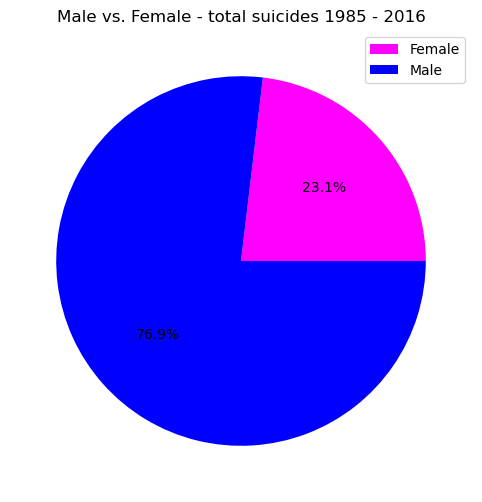

In [23]:
plt.pie(male_female_suicides, colors= ["magenta", "blue"], autopct="%1.1f%%")
plt.legend(labels = ["Female", "Male"], loc = "upper right")
plt.title("Male vs. Female - total suicides 1985 - 2016")
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

suicide_100k_populationThis seems legit. The statistic information on an official website for suicide prevention(https://save.org/about-suicide/suicide-statistics/) tells us that "There are 3.9 male deaths by suicide for each female death by suicide.", which corresponds to the data on my visualisation.<br>

However, this is pretty interesting. Why men commit suicide more often than women (to be more precide 4 times more often). Well, I can thinkg of some explanations for this pattern:
1. **Emotion** - women are definitely more prone to express their emotion and thus they find a relief. On the other side, men are not expressing their emotion and feel not understood.
2. **Alpha-male** - men are still considering themselves as the dominating sex-group and this discourages them from seeking help, talking about the issue and showing their emotions.
3. **Career pressure** - the traditional male role includes providing food and basic needs for the family. Struggling in this might be very stressful for a man which can lead to disordered menthal health and suicide.
4. **Substance abuse** - men are definitely more prone to get addicted to alcohol or drugs, which also lead to disordered menthal health and inability to search for a support.
<br>
There might be also other reasons for this pattern, but there should be the main. Ok, now I want to see the top 10 ranked countries based on suicides by 100k population.<br>


##### 2.3.2 Suicides per country

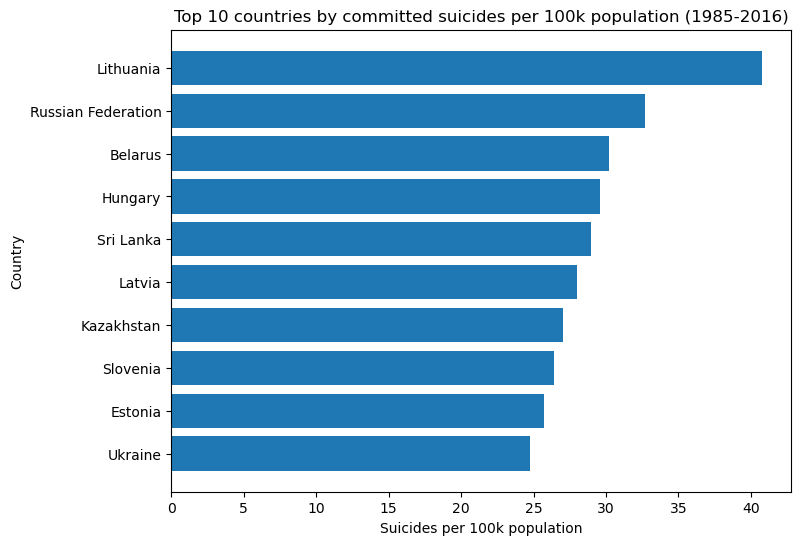

In [24]:
labels = suicide_100k_population.suicide_per_100k_total.groupby(suicide_100k_population.country).mean().nlargest(10).sort_values().index.tolist()
data = suicide_100k_population.suicide_per_100k_total.groupby(suicide_100k_population.country).mean().nlargest(10).sort_values().tolist()

plt.figure(figsize=(8,6))
plt.barh(labels, data)
plt.title("Top 10 countries by committed suicides per 100k population (1985-2016)")
plt.xlabel("Suicides per 100k population")
plt.ylabel("Country")
plt.show()

I can see a lot of countries from the ex USSR, but there are also some countries like Sri Lanka, Hungary and Slovenia that might be interesting for a research.<br>
Before I start with the exlanation, I want to check the data once again in the official ranking for 2019 (https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate). I can see that the Russia is ranked 11-th and above Russia are mainly African countries or islands, but one country attracts my attention. Lesotho has 87.5 suicides per 100k population which is extreme. There is even an open programm for helping the local people (https://helplesotho.org/lesothos-suicide-crisis/). Many of them are completely hopelessness after decades of poverty, high unemployment and disordered menthal health. <br>
But lets come back to the data that I can derive from this dataset. I will start with an explanation why the ex USSR countries have highest suicide rate per 100k population.<br>
1. **Data manipulation** - even if it is not confirmed, people in Russia (and in other ex-USSR countries) get executed by the government and the autopsy concludes then that it was a suicide. This increases the suicide cases artificially.
2. **Economic situation** - another reason might be the economic instability after the transition from communism to capitaism. A lot of people lost their jobs which increased the poverty in these countries. This resulted in alcohol abuse.
<br>
Sri Lanka is another critical case which has been established as one of the countries with permanently very high suicide rate per 100k population. The reasons for this do not differ so much than the traditional - economic factor, lack of education, bad menthal health and family issues. However the method there is very "innovative". As an agricultural land, people there used to use pesticide for self-poisoning.

<br>
Slovenie and Hungary on the other side are an interesting case, because there is no logical explanation for the extremely high values for suicidal rates. This aricle explains in details how this statistics might have been an error, manipulated data. It suggests that "the medical examiners in Hungary certify those deaths as suicide which would otherwise be labeled as undetermined death or as death related to other causes." <br>

source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3698008/

<br>
Of course, the data above is just a mean value for the countries, but it matters to see whether these countries marked a decline or increase in the time. So first I will prepare my data and then plot each of these countries separately to check how the suicide rate per 100k population developed over the time.

##### 2.3.3 Year distribution

In [25]:
suicide_russia = suicide_100k_population[suicide_100k_population["country"] == "Russian Federation"]
suicide_lithuania = suicide_100k_population[suicide_100k_population["country"] == "Lithuania"]
suicide_sri_lanka = suicide_100k_population[suicide_100k_population["country"] == "Sri Lanka"]
suicide_hungary = suicide_100k_population[suicide_100k_population["country"] == "Hungary"]
suicide_belarus = suicide_100k_population[suicide_100k_population["country"] == "Belarus"]
suicide_kazahkstan = suicide_100k_population[suicide_100k_population["country"] == "Kazakhstan"]
suicide_latvia = suicide_100k_population[suicide_100k_population["country"] == "Latvia"]
suicide_slovenia = suicide_100k_population[suicide_100k_population["country"] == "Slovenia"]
suicide_estonia = suicide_100k_population[suicide_100k_population["country"] == "Estonia"]
suicide_ukraine = suicide_100k_population[suicide_100k_population["country"] == "Ukraine"]
suicide_germany = suicide_100k_population[suicide_100k_population["country"] == "Germany"]

I added Germany in my list, because this country will be a subject of my further work in this project, so I want to compare it with the most conspicuous countries.

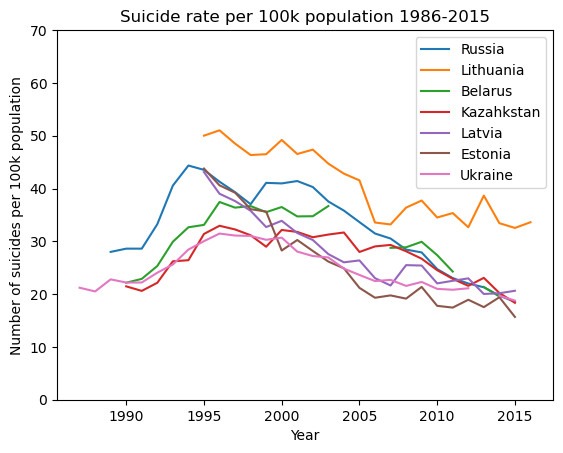

In [26]:
plt.plot(suicide_russia.suicide_per_100k_total.groupby(suicide_russia.year).mean(), label = "Russia")
plt.plot(suicide_lithuania.suicide_per_100k_total.groupby(suicide_lithuania.year).mean(), label = "Lithuania")
plt.plot(suicide_belarus.suicide_per_100k_total.groupby(suicide_belarus.year).mean(), label = "Belarus")
plt.plot(suicide_kazahkstan.suicide_per_100k_total.groupby(suicide_kazahkstan.year).mean(), label = "Kazahkstan")
plt.plot(suicide_latvia.suicide_per_100k_total.groupby(suicide_latvia.year).mean(), label = "Latvia")
plt.plot(suicide_estonia.suicide_per_100k_total.groupby(suicide_estonia.year).mean(), label = "Estonia")
plt.plot(suicide_ukraine.suicide_per_100k_total.groupby(suicide_ukraine.year).mean(), label = "Ukraine")
plt.title("Suicide rate per 100k population 1986-2015")
plt.xlabel("Year")
plt.ylabel("Number of suicides per 100k population")
plt.ylim(ymin=0, ymax = 70)
plt.legend()
plt.show()

When I look at the countries, these are mainly the European countries from the Soviet Union and they had industrial orientation. If I look at the chart, I can find some interesting patterns here:
1. Sharp increase from 1986 to around 1995 (for the countries, for which we have records in the dataset for these years).
- The collapse of the USSR in 1991 must have resulted in fear, incertainty about the future, high unemployment rates, financial collapse and many more critical consequences that led to increase in the suicide rate in the years after that.
- The other countries which are missing in our dataset for the pre-collapse time of USSR are also confirming the same pattern. For example Lithuania showed lower levels of suicide rate per 100k population in the years when USSR existed ([source](https://en.wikipedia.org/wiki/Suicide_in_Lithuania)). The same goes also for Estionia ([source](https://pubmed.ncbi.nlm.nih.gov/1950623/)).

2. Sharp decrease in the suicide rate after around 1995 to 2015 for all the countries except Lithuania.
- Since 1994-1996 and especially after 2001, I can see a sharp decrease for all the countries (except Lithuania). This might be a result of overcoming the initial shock and crisis in the economy.
- something very interesting to mention is the short sharp increase in suicide rate in 1998-1999. This should be the consequence of the Russian financial crisis, when the Russian governement and the Russian Central Bank devalued the Russin ruble and thus waped out the savings of many families. This had also an impact to the other countries, which were close to Russia and especially countries whose economy was dependent from Russia.
- Lithuania is the only country that follows it's own pattern and could not lower the levels as much as the other countries from the ex Soviet Union.

3. Fluctuation (2005-2015) after a sharp decrease (2000-2005) for Lithuania - the only country with such a pattern.
- Similarly to the other countries, Lithuania had a sharp increase in the years after the fall of USSR and in 2000 year the suicide rate started to decrease till 2005, when the decrease stopped and started a period of fluctuations.
- Lithuania worked a lot to find a solution for suicide prevention. They started even a national programm - the National Mental Health Strategy in 2007 and in 2016-2020 they adopted the Suicide Prevention Action Plan. All these measures showed very good results and Lithuania managed to decrease significantly it's suicide rate per 100k population. The last report in 2019 showed only about 20 suicides per 100k population which is approximately a 50% decrease from the 35-40 suicides per 100k population in the period 2005-2015. ([source](https://en.wikipedia.org/wiki/Suicide_in_Lithuania))


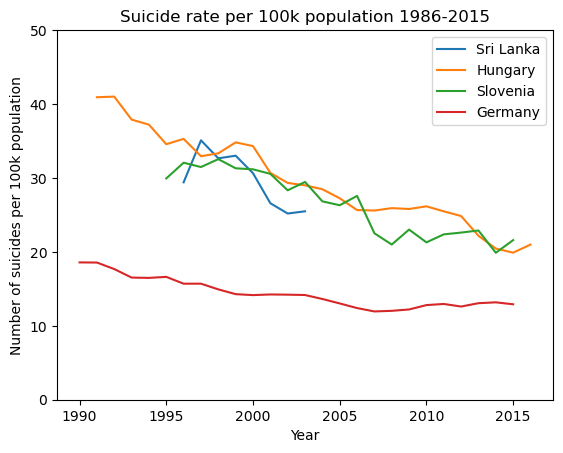

In [27]:
plt.plot(suicide_sri_lanka.suicide_per_100k_total.groupby(suicide_sri_lanka.year).mean(), label = "Sri Lanka")
plt.plot(suicide_hungary.suicide_per_100k_total.groupby(suicide_hungary.year).mean(), label = "Hungary")
plt.plot(suicide_slovenia.suicide_per_100k_total.groupby(suicide_slovenia.year).mean(), label = "Slovenia")
plt.plot(suicide_germany.suicide_per_100k_total.groupby(suicide_germany.year).mean(), label = "Germany")
plt.title("Suicide rate per 100k population 1986-2015")
plt.xlabel("Year")
plt.ylabel("Number of suicides per 100k population")
plt.ylim(ymin=0, ymax = 50)
plt.legend()
plt.show()

 These three countries do not have so much similarity and for this reason I would prefer to discuss them separately:
1. **Sri Lanka**:
- Unfortunately the dataset is not complete so we can not see the full picture, but looking at ([this](https://www.macrotrends.net/countries/LKA/sri-lanka/suicide-rate)) graphic I can see a significant decrease in the suicides in Sri Lanka in the long term.
- Something very interesting is the sharp increase in suicide cases in 1997 and once in 2005. A quick research can answer my question what could be the reason here. End of December 2004 Sri Lanka was hit by a devastating tsunami which caused enormous damages to the people. ([This](https://cmgds.marine.usgs.gov/data/srilanka05/index.html)) article gives more information about this. The civilian casualties were approximately 35,000 people and about 100,000 houses were destroyed.
- 1997 was another year with sharp increase in the suicides in Sri Lanka. At this time the Sri Lanka army startet a military operation against LTTE. Shortly after that the LTTE attacked the Sri Lankas army and took over two cities. People in these cities might have committed suicide in order to avoid further harassment from the LTTE.
2. **Hungary**:
- It was already confirmed that the suicides in Hungary might have been increased artificially. However, I can clearly see a extremely good trend of decrease in suicide cases so it must have another factors.
- 1990 was the regime change from Communism to Democracy and it can be seen that the decrease started exactly in 1990. I would want to confirm this pattern and searched for a data prior 1990. ([Here](https://annals-general-psychiatry.biomedcentral.com/articles/10.1186/1744-859X-12-21)) there is a graphic of the suicide rate per 100k population for Hungary from 1961 to 2011 and it is clear to see how the suicide cases start rising since 1961 and top somewhere in 1987.
- Here it can be found the same pattern of short-term rise of the suicide cases in 1990 (exactly when the regime changed) and a continious decrease after that. The explanation for this must be just a shock for people were Communism supporters and lost their jobs or maybe their families, wealth etc.
- This trend still continues and reached levels of approximately 11-12 suicides per 100k population in the 2016-2019 years, but the life in Hungary improved significantly in the last years under the rule of Viktor Orban.
3. **Slovenia**:
- Slovenie is another case similar to Hungary, where the statistics might have been distorted. However, the overall trend is good for Slovenia and shows gradual decrease even if the data for some years is missing.
- The main reasons for comitting a suicide are still menthal disorder, alcohol abuse and depression. Nothing special that attracts our attention. What is interesting about Slovenia is that they still do not have a national programm about suicide prevention. ([source](https://english.radio.cz/slovenia-among-countries-highest-suicide-rate-8627868)) That's why the suicide rate is fluctuating so much.
- This trend continues for Slovenie also in the next years reaching a minimum of 12.8 suicides per 100k population in 2018, but it still fluctuates a lot and movements from about 10% up or down from year to year is not something unusual.
4. **Germany**:
- Germany is the leading economic power in Europe (and one of the best economies in the world), ranks 4-th in GDP after US, China and Japan and is one of the most prefered countries in Europe to settle in. We can expect that people in Germany live well (they have high GDP per capita - 20-th in the world ranking), great HDI (9-th in the world) and comitting a suicide should be rather an exception here than a mass event. This can be confirmed also from the data in our dataset.
- Germany had a gradual decrease in the suicide rate starting from the beginning - 1986 (according to the data in our dataset) and this decrease continued up to 2007. The trigger event in this decrease might be the world financial crisis which hit the big economies earlier and Germany was one of them. The unemployment rate increased dramatically in 2006 ([source](https://tradingeconomics.com/germany/unemployment-rate)), people lost their jobs, homes, wealth etc. Since then for the next 8 years Germany did not have any clear trend, but fluctuating at arount 10-15 suicides per 100k population.
- For the last years, Germany marked a new All-Time-Low in the suicide rate reaching levels of about 8 suicides for 100k population. Even the Covid pandemic could not influence significantly the suicide rate levels in Germany, although the measures there were extremely harsch. (according to [this](https://www.cambridge.org/core/journals/epidemiology-and-psychiatric-sciences/article/trends-in-suicide-rates-during-the-covid19-pandemic-restrictions-in-a-major-german-city/18DC61208661CBCC5D527BC38A8616C9) article)

Well, I will continue my work focusing on Germany as one of the leading economies in the world and a country with very good KPIs about life quality, human development, financial status of the population. It is interesting for me to analyse why and how people commit suicide in Germany.

#### 3. Suicide data - focus on Germany

##### 3.1 Data acquisition and Data familiarisation

First I will prepare my data, containing only the records for Germany and will check the shape and the value types.

In [28]:
suicide_data_germany = suicide_data_world[suicide_data_world.country == "Germany"]

In [29]:
suicide_data_germany.shape

(312, 10)

In [30]:
suicide_data_germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 9710 to 10021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             312 non-null    object 
 1   year                312 non-null    int64  
 2   sex                 312 non-null    object 
 3   age                 312 non-null    object 
 4   suicides_no         312 non-null    int64  
 5   population          312 non-null    int64  
 6   suicides_per_100k   312 non-null    float64
 7   gdp_for_year_usd    312 non-null    object 
 8   gdp_per_capita_usd  312 non-null    int64  
 9   generation          312 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 26.8+ KB


Ok, as expected, no missing values, columns look good, we already did our job so the only think I want to make is to drop the columns ```country```,```population``` and ```gdp_for_year_usd```. Why I do that?<br>
```country``` -> There is only 1 unique value after filtering the main dataset and it is Germany, so the column is useless.<br>
```population``` -> I have made the calculation for the suicide rate per 100k population and the raw number for the population in the different groups is not needed anymore for the future actions in this project.<br>
```gdp_for_year_usd``` -> I will not compare Germany with other countries further in this project, but will focus on Germany.<br>
```suicides_per_100k``` -> I have exact calculations for this kpi and will use it for precision.

##### 3.2 Data tidying and cleaning<br>

In [31]:
suicide_data_germany = suicide_data_germany.drop(columns = ["country","population", "gdp_for_year_usd", "suicides_per_100k"], axis = 1)

In [32]:
suicide_germany.head(10)

,country,year,suicide_per_100k_total
1050,Germany,1987,NaN
1051,Germany,1988,NaN
1052,Germany,1989,NaN
1053,Germany,1990,18.575537
1054,Germany,1991,18.557299
1055,Germany,1992,17.677262
1056,Germany,1993,16.524858
1057,Germany,1994,16.481907
1058,Germany,1995,16.619491
1059,Germany,1996,15.696723


Ok, these are our two dataframes and now I want to join them together. Then I will need to drop again the ```country``` column.

In [33]:
suicide_data_germany = pd.merge(suicide_data_germany, suicide_germany, on ="year", how ="inner")
suicide_data_germany.drop(columns = ["country"], axis = 1, inplace=True)

In [34]:
suicide_data_germany.head(15)

,year,sex,age,suicides_no,gdp_per_capita_usd,generation,suicide_per_100k_total
0,1990,male,75+ years,1516,23546,G.I. Generation,18.575537
1,1990,male,55-74 years,2406,23546,G.I. Generation,18.575537
2,1990,male,35-54 years,3302,23546,Silent,18.575537
3,1990,female,75+ years,1174,23546,G.I. Generation,18.575537
4,1990,male,15-34 years,1488,23546,Boomers,18.575537
5,1990,female,55-74 years,1417,23546,G.I. Generation,18.575537
6,1990,male,15-34 years,800,23546,Generation X,18.575537
7,1990,female,35-54 years,1128,23546,Silent,18.575537
8,1990,female,15-34 years,434,23546,Boomers,18.575537
9,1990,female,15-34 years,228,23546,Generation X,18.575537


Perfect, now it looks much better and we can start with the visualisations.
#### 3.3 Data visualization<br>
##### 3.3.1 Male vs. Female<br>

First I will start again with a visualisation of the sicides male vs. female. It would be interesting to see whether the percentage are the same or at least similar comparing to the whole world.

In [35]:
male_female_suicides_germany = suicide_data_germany.suicides_no.groupby(suicide_data_germany.sex).sum()

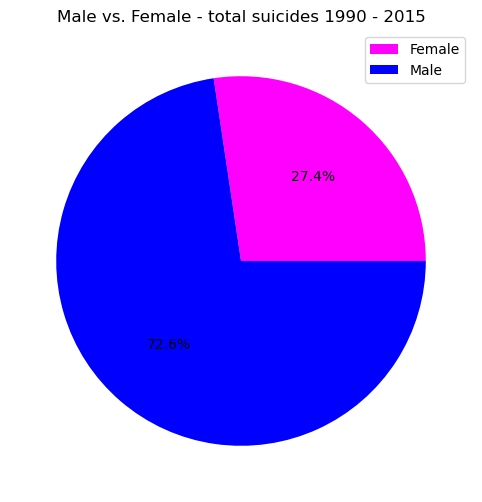

In [36]:
plt.pie(male_female_suicides_germany, colors= ["magenta", "blue"], autopct="%1.1f%%")
plt.legend(labels = ["Female", "Male"], loc = "upper right")
plt.title("Male vs. Female - total suicides 1990 - 2015")
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

Well, similar distribution, but it looks like more females in Germany commit suicides in comparison to the world distribution. According to the official analysis published from the WHO ([link](http://apps.who.int/iris/bitstream/handle/10665/131056/9789241564878_eng.pdf#page=27)) the ratio for male to female suicides in high-income countries (like Germany) ist ```3.5:1```. In our case we have a relation for Germany of ```2.65:1```. What might be the reason for this?
- First of all, I can see a difference in the sex ratio in Germany in comparison to the world population:
World ([source](https://www.cia.gov/the-world-factbook/countries/world/#people-and-society)): The value for the entire world population is 1.01 males/female, with 1.07 at birth, 1.06 for those under 15, 1.02 for those between 15 and 64, and 0.78 for those over 65.
Germay ([source](https://en.wikipedia.org/wiki/Demographics_of_Germany)): The value for Germany is 0.97 males/female, with 1.06 at birth, 1.05 for those under 15, 1.02 for those between 15 and 64, and 0.76 for those over 65.

This means, that in Germany there are more females than males. An explanation for the slightly more female suicides in Germany might be:
- Women need to make a family and children. The fewer men means that there are increased number of women without spouse, without the chance to create a family and children. This results in depression, inferiority feeling and one of the next steps might be committing a suicide.
- Such statistics should not surprise us, because the WW2 was devastating for Germany and the lost a lot of manpower during the war, so logically there are more females than males in Germany, but obviously this fact has negative consequences and triggers the female suicides in Germany.

In [37]:
def male_female_visualization_data(dataset, year):
    return dataset[dataset.year== year].suicides_no.groupby(dataset.sex).sum()

In [38]:
list_all_years_male_vs_female = []
for year in range(1985,2017):
    value = male_female_visualization_data(suicide_data_germany,year)
    list_all_years_male_vs_female.append(value)

In [39]:
list_sex_ratio = []
for value in range (len(list_all_years_male_vs_female)):
    try:
        ratio = list_all_years_male_vs_female[value][1]/list_all_years_male_vs_female[value][0]
        list_year = []
        list_year.append(value+1985)
        list_year.append(ratio)
        list_sex_ratio.append(list_year)
    except:
        continue

In [40]:
sex_ratio = pd.DataFrame(list_sex_ratio, columns = ["year", "ratio"])
sex_ratio = sex_ratio.set_index("year")

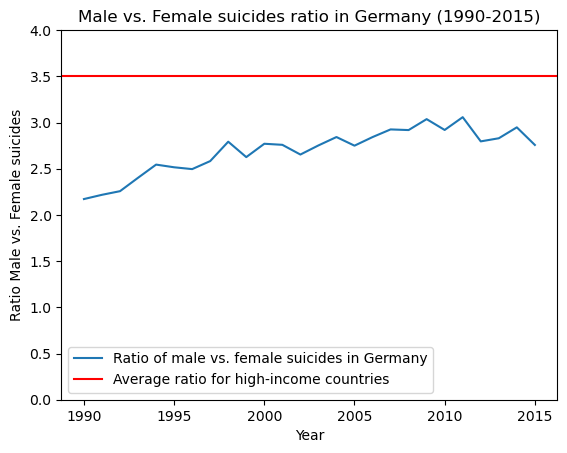

In [41]:
plt.plot(sex_ratio.index, sex_ratio.ratio, label = "Ratio of male vs. female suicides in Germany")

plt.title("Male vs. Female suicides ratio in Germany (1990-2015)")
plt.xlabel("Year")
plt.ylabel("Ratio Male vs. Female suicides")
plt.axhline(y = 3.5, color = "red", label = "Average ratio for high-income countries")
plt.ylim(ymin=0, ymax=4)
plt.legend()
plt.show()

Well, here I can see that the ratio of male vs. female suicides is below the average ratio for high-income countries (like Germany). This is interesting. In low/middle-income countries the ratio is significantly lower. Accordin to ghe ([WHO report](http://apps.who.int/iris/bitstream/handle/10665/131056/9789241564878_eng.pdf#page=27)) the ratio for upper-middle-income countries is about 1.7 and for lower-middle-income and lower-income countires it is 1.7. This means, that men in high-income countries are much more prone to commit suicide while in lower-income countries female suicides are increasing and compensate at certain degree the male suicides lowering the ratio. What can be the reason for this significant difference?<br>
- First of all, men who live in awell developed countri with high incomes are more prone to feel inferior, if they can not satisfy the needs of their families for example. The traditional role of a man is to earn enough money and take good care for their family. However, the financial status is sometimes a big issue especially in those countries where the cost of living is also very high. This is influenced also by the media, which promotes the Alpha-man type, shows photos, videos and articles of successful men, millionaires etc. This increases the inferiority feeling of people from the low or even middle class and reduces the mental health.
- Another reason might be that high-income countries do have easier acces to firearms and men tend to use methods for suicide where they will not have any survival chance.
- Last but not least, the decreased fertility might also be a reason in the developed countries. It is very expensive to have children and for this reason, many families do not want to have one or can not have one (because of any health reason). Not having a kid might be very demotivating in the future when people get old and for traditional man this would mean mission failed in life.<br>
- On the other side, people in lower-income countries do not have an easy access to firearms, live often closer together or even in tribes in some countries and men do not have so much pressure to earn a lot of money and secure a perfect life for the family, but just to ensure food and cover basic needs. The fertility in these countries is also often much higher and men are feeling needed, they must ensure the food and basic needs for their (big) family.

Ok, but why does Germany have lower ratio than the other high-income countries?<br>
- Well I want first to give more information which are the "high-income countires" qualified from WHO to shed more light on the topic. These are Andorra, Antigua and Barbuda, Australia, Austria, Bahamas, Bahrain, Barbados, Belgium, Brunei Darussalam, Canada, Chile, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Latvia, Lithuania, Luxembourg, Malta, Monaco, Netherlands, New Zealand, Norway, Oman, Poland, Portugal, Qatar, Republic of Korea, Russian Federation, Saint Kitts and Nevis, San Marino, Saudi Arabia, Singapore, Slovakia, Slovenia, Spain, Sweden, Switzerland, Trinidad and Tobago, United Arab Emirates, United Kingdom, United States of America, Uruguay.
- Even if these all are good developed countries with (relatively) high standard of living, Germany is one of the best developed countries. Furthermore, there are some countries, that I would not qualify as "high-income" or even good developed and these countries definitely distort the statistics about the ratio of male vs female suicides.

And why the ratio from about 2.2 up to 3 in Germany for the time period 1990 - 2010?
- Well, the devastating consequences of WW2 for Germany brought the country to a situation, where they did not hava enough manpower. Not only for rebuilding the country, but also for increasing the fertility. Fewer men means that every man can easily find a women and this increases the happines of the men. On the other side, women could not find a man so easy and this increases the suicide potential for the women. However, the male vs. female ratio in the German population started to normalize slowly and this had a direct effect on the male vs. female suicide ratio.
- In the period 2006-2010 we can see a fluctuation in the ratio and shorterm increase in the male vs. female suicide ratio. The reason for this should be the big financial crisis, which increased the unemployment rate and left people and families without home and savings.

Ok, lets get a quick look of the male vs. female ratio in the different age groups. I will first prepare the data for visualisation.

In [42]:
suicide_data_germany_05_14 = suicide_data_germany[suicide_data_germany["age"] == "05-14 years"]
suicide_data_germany_15_34 = suicide_data_germany[suicide_data_germany["age"] == "15-34 years"]
suicide_data_germany_35_54 = suicide_data_germany[suicide_data_germany["age"] == "35-54 years"]
suicide_data_germany_55_74 = suicide_data_germany[suicide_data_germany["age"] == "55-74 years"]
suicide_data_germany_75 = suicide_data_germany[suicide_data_germany["age"] == "75+ years"]

In [43]:
list_05_14_male_vs_female = []
list_15_34_male_vs_female = []
list_35_54_male_vs_female = []
list_55_74_male_vs_female = []
list_75_male_vs_female = []
for year in range(1985,2017):
    value = male_female_visualization_data(suicide_data_germany_05_14,year)
    list_05_14_male_vs_female.append(value)
    
    value_1 = male_female_visualization_data(suicide_data_germany_15_34,year)
    list_15_34_male_vs_female.append(value_1)
    
    value_2 = male_female_visualization_data(suicide_data_germany_35_54,year)
    list_35_54_male_vs_female.append(value_2)
    
    value_3 = male_female_visualization_data(suicide_data_germany_55_74,year)
    list_55_74_male_vs_female.append(value_3)
    
    value_4 = male_female_visualization_data(suicide_data_germany_75,year)
    list_75_male_vs_female.append(value_4)

In [44]:
age_groups = suicide_data_germany.age.unique()

In [45]:
def filter_age_groups(dataset, condition):
    return dataset[dataset.age == condition].suicides_no.groupby(dataset.sex).sum()

In [46]:
def create_pie_chart(dataset, condition):
    plt.pie(filter_age_groups(dataset, condition), colors= ["magenta", "blue"], autopct="%1.1f%%")
    plt.legend(labels = ["Female", "Male"], loc = "upper right")
    plt.title(f"Male vs. Female - total suicides 1990 - 2015 ({condition})")
    fig = plt.gcf()
    fig.set_size_inches(8,6)
    plt.show()

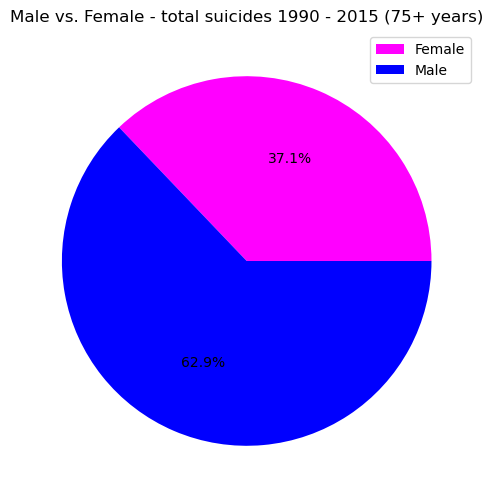

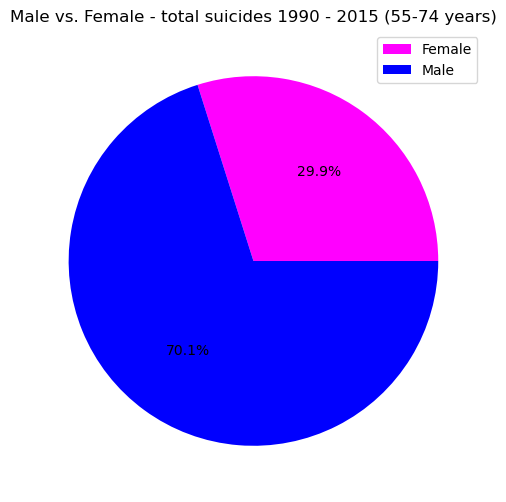

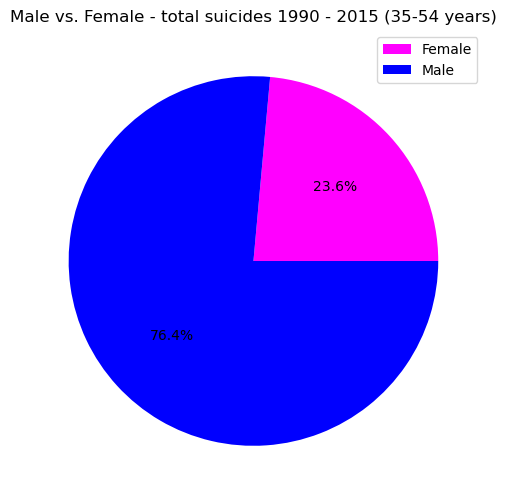

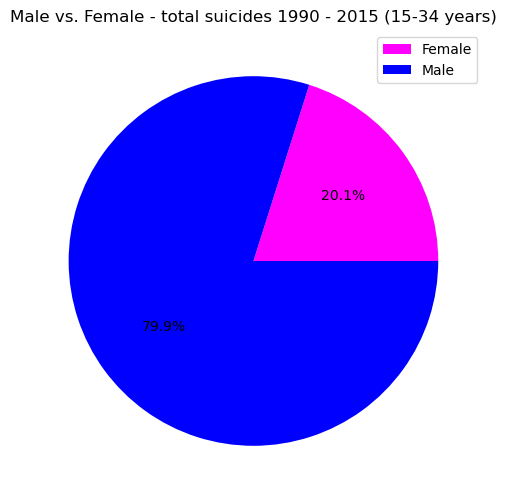

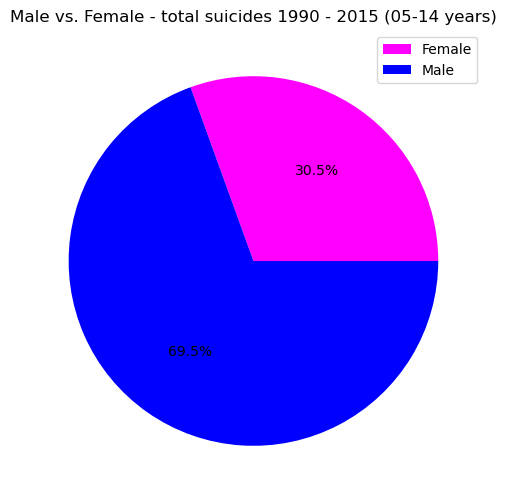

In [47]:
for age_group in age_groups:
    create_pie_chart(suicide_data_germany, age_group)

Ok, interesting results and only the ```35-54 years``` and the ```55-74 years``` age groups show closer male vs. female suicide ratio in comparison to the complete German population. However, I would want to see what the reasons might be for such a high deviation in some age groups. I want to see how the ratio developed over the time and will comment it after that.<br>

I am starting with the **05-14 years** age group: <br>

In [48]:
list_sex_ratio_05_14 = []
for value in range (len(list_05_14_male_vs_female)):
    try:
        ratio = list_05_14_male_vs_female[value][1]/list_05_14_male_vs_female[value][0]
        list_year = []
        list_year.append(value+1985)
        list_year.append(ratio)
        list_sex_ratio_05_14.append(list_year)
    except:
        continue

In [49]:
sex_ratio_05_14 = pd.DataFrame(list_sex_ratio_05_14, columns = ["year", "ratio"])
sex_ratio_05_14 = sex_ratio_05_14.set_index("year")

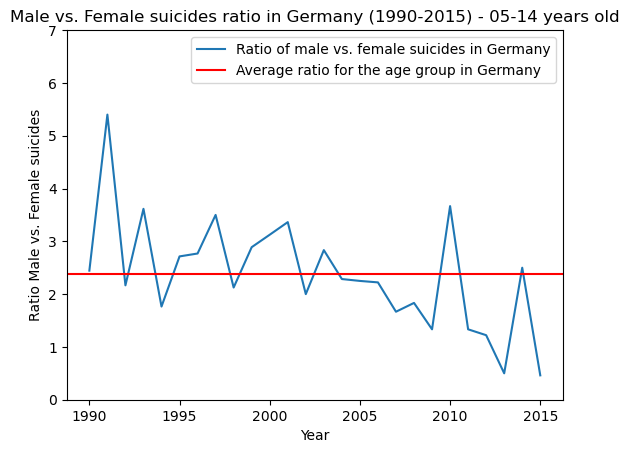

In [50]:
plt.plot(sex_ratio_05_14.index, sex_ratio_05_14.ratio, label = "Ratio of male vs. female suicides in Germany")

plt.title("Male vs. Female suicides ratio in Germany (1990-2015) - 05-14 years old")
plt.xlabel("Year")
plt.ylabel("Ratio Male vs. Female suicides")
plt.axhline(y = sex_ratio_05_14.ratio.mean(), color = "red", label = "Average ratio for the age group in Germany")
plt.ylim(ymin=0, ymax=7)
plt.legend()
plt.show()

Wow, great fluctuation in this age group, but I suppose that there are not so many suicide cases and each case does have a big influence over the statistics. This age group covers also only 10 years and there are expected fewer suicide cases in this age group.
For this reason I do not consider the separate years as very powerful arguments, but I see a good downtrend, which means that male children commit suicide more and more seldom in comparison to the female children.
Here it comes the question, how and why a children aged 05-14 years would commit suicide. 
- Violence in the family would be my first guess why a children would have suicide thoughts. 
- Bullying in the school would be another good guess. Unfortunately a lot of children are getting bullied from their schoolmates and this is a very strong motivation for a young man or women to end their life.
- Attention deficit or other problems in the family could also be the reason.

Here just to confirm my words that there are too few suicide cases and this causes the strong fluctuation.

In [51]:
list_05_14_male_vs_female

[Series([], Name: suicides_no, dtype: int64),
 Series([], Name: suicides_no, dtype: int64),
 Series([], Name: suicides_no, dtype: int64),
 Series([], Name: suicides_no, dtype: int64),
 Series([], Name: suicides_no, dtype: int64),
 sex
 female     9
 male      22
 Name: suicides_no, dtype: int64,
 sex
 female     5
 male      27
 Name: suicides_no, dtype: int64,
 sex
 female    12
 male      26
 Name: suicides_no, dtype: int64,
 sex
 female    13
 male      47
 Name: suicides_no, dtype: int64,
 sex
 female    17
 male      30
 Name: suicides_no, dtype: int64,
 sex
 female    14
 male      38
 Name: suicides_no, dtype: int64,
 sex
 female    13
 male      36
 Name: suicides_no, dtype: int64,
 sex
 female     8
 male      28
 Name: suicides_no, dtype: int64,
 sex
 female    16
 male      34
 Name: suicides_no, dtype: int64,
 sex
 female     9
 male      26
 Name: suicides_no, dtype: int64,
 sex
 female     8
 male      25
 Name: suicides_no, dtype: int64,
 sex
 female    11
 male      37


Let's now take a look at the next age group: **15-34 years**

In [52]:
list_sex_ratio_15_34 = []
for value in range (len(list_15_34_male_vs_female)):
    try:
        ratio = list_15_34_male_vs_female[value][1]/list_15_34_male_vs_female[value][0]
        list_year = []
        list_year.append(value+1985)
        list_year.append(ratio)
        list_sex_ratio_15_34.append(list_year)
    except:
        continue

In [53]:
sex_ratio_15_34 = pd.DataFrame(list_sex_ratio_15_34, columns = ["year", "ratio"])
sex_ratio_15_34 = sex_ratio_15_34.set_index("year")

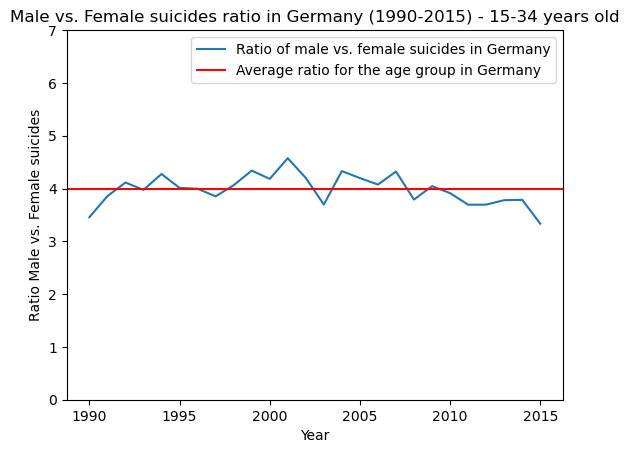

In [54]:
plt.plot(sex_ratio_15_34.index, sex_ratio_15_34.ratio, label = "Ratio of male vs. female suicides in Germany")

plt.title("Male vs. Female suicides ratio in Germany (1990-2015) - 15-34 years old")
plt.xlabel("Year")
plt.ylabel("Ratio Male vs. Female suicides")
plt.axhline(y = sex_ratio_15_34.ratio.mean(), color = "red", label = "Average ratio for the age group in Germany")
plt.ylim(ymin=0, ymax=7)
plt.legend()
plt.show()

Well there is not a clear trend here and the ratio is fluctuating around 4 male suicides vs. 1 female suicide. This is a little bit higher than the standard ratio of 3.5 for high-income countries. At this age, people are very prone to commit suicide due to variety of reasons.
- Peer pressure - teenagers are very emotional and insecure, especially when they are getting bullied by their schoolmates. This can decrease their self-esteem, distort their mental health and be reason for a suicide.
- Relationship difficulties - well, the first time a teenager inloves and gets rejected can be really painful and if combined with other critical factors, this might results in a suicide. The same goes of course for an youth person.
- Substance or alcohol abuse - at these ages, people try a lot of things for a first time and exactly then they get some addictions, which might have devastating influence on their entire life. Some of them try drugs, tobacco or alcohol and if they get addicted, the chance of committing suicide rises dramatically. Other try gambling or start doing illegal things.

Looking forward to the **35-54 years** age group:

In [55]:
list_sex_ratio_35_54 = []
for value in range (len(list_35_54_male_vs_female)):
    try:
        ratio = list_35_54_male_vs_female[value][1]/list_35_54_male_vs_female[value][0]
        list_year = []
        list_year.append(value+1985)
        list_year.append(ratio)
        list_sex_ratio_35_54.append(list_year)
    except:
        continue

In [56]:
sex_ratio_35_54 = pd.DataFrame(list_sex_ratio_35_54, columns = ["year", "ratio"])
sex_ratio_35_54 = sex_ratio_35_54.set_index("year")

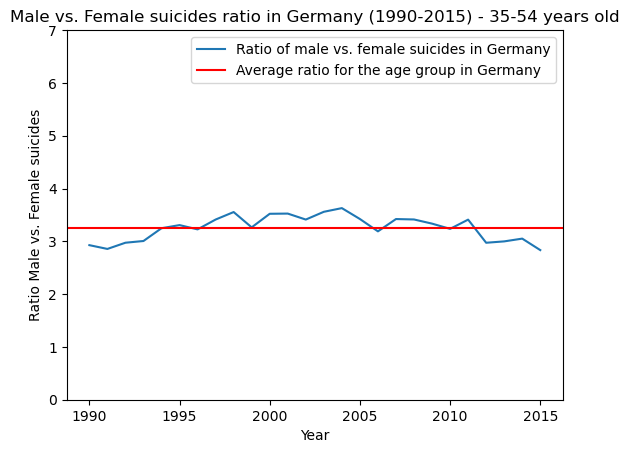

In [57]:
plt.plot(sex_ratio_35_54.index, sex_ratio_35_54.ratio, label = "Ratio of male vs. female suicides in Germany")

plt.title("Male vs. Female suicides ratio in Germany (1990-2015) - 35-54 years old")
plt.xlabel("Year")
plt.ylabel("Ratio Male vs. Female suicides")
plt.axhline(y = sex_ratio_35_54.ratio.mean(), color = "red", label = "Average ratio for the age group in Germany")
plt.ylim(ymin=0, ymax=7)
plt.legend()
plt.show()

The same here, we can not see any clear trend, just fluctuating around 3.5 male suicides vs. 1 female suicide. At this age people commit a suicide because of many reasons as for example:
- Financial problems - especially if a man has a family and meets financial problems so that he can not ensure "the food on the table". This can be extremely demotivating for man.
- Relationship problems - whether with the spouse or with the children, both might be a reason to commit a suicide.
- Of course, substance abuse and social isolation stay as significant factors at this age.

The next group is the age group **55-74 years**:

In [58]:
list_sex_ratio_55_74 = []
for value in range (len(list_55_74_male_vs_female)):
    try:
        ratio = list_55_74_male_vs_female[value][1]/list_55_74_male_vs_female[value][0]
        list_year = []
        list_year.append(value+1985)
        list_year.append(ratio)
        list_sex_ratio_55_74.append(list_year)
    except:
        continue

In [59]:
sex_ratio_55_74 = pd.DataFrame(list_sex_ratio_55_74, columns = ["year", "ratio"])
sex_ratio_55_74 = sex_ratio_55_74.set_index("year")

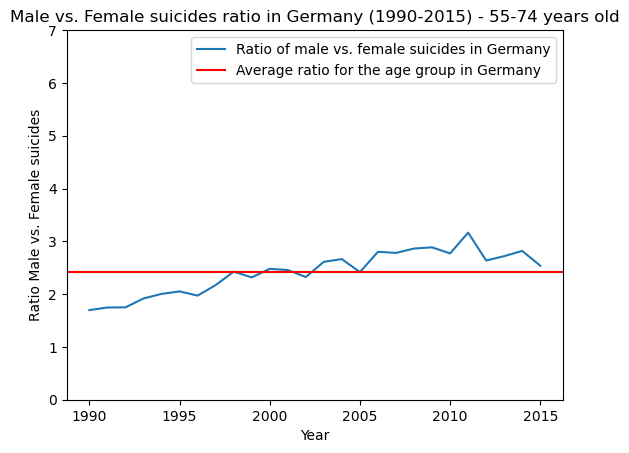

In [60]:
plt.plot(sex_ratio_55_74.index, sex_ratio_55_74.ratio, label = "Ratio of male vs. female suicides in Germany")

plt.title("Male vs. Female suicides ratio in Germany (1990-2015) - 55-74 years old")
plt.xlabel("Year")
plt.ylabel("Ratio Male vs. Female suicides")
plt.axhline(y = sex_ratio_55_74.ratio.mean(), color = "red", label = "Average ratio for the age group in Germany")
plt.ylim(ymin=0, ymax=7)
plt.legend()
plt.show()

Well in this age group we can see a good uptrend in the ratio of male vs. female suicides in Germany. This means that men aged 55-74 years commit more often a suicide than the women at this age. Or alternatively, the women at this age commit suicide more seldom than the men. It would be interesting to find out what the reason could be.

- Well, I would say that the women in 1990s commited suicides more often then in the current times and for this reason the ratio back then was at about 2-2.5 levels. The reason for the suicides could be loss of loved ones during the WW2 for example. Even if it was a long time ago, the WW2 left a lot of women without men and children. At this age, many women did not have any relatives, who can take care of them.
- Another reason can definitely be the declined physical health at this age. People are often in wheelchairs or can walk only with assisting tools. In such cases, elderly people decide to end their life earlier.
- Approaching the more recent years, I can see that the ratio rises which means that men are committing more suicides than the women. There are some fluctuations in the last years, but the rise of the ratio is clear. An interesting point can be that in 2005 Angela Merkel was elected for a first time and became the first female canchellor of Germany. This could have a cruicial influence to the more radical German men.

Ok, let's the last group: **75+ years**

In [61]:
list_sex_ratio_75 = []
for value in range (len(list_75_male_vs_female)):
    try:
        ratio = list_75_male_vs_female[value][1]/list_75_male_vs_female[value][0]
        list_year = []
        list_year.append(value+1985)
        list_year.append(ratio)
        list_sex_ratio_75.append(list_year)
    except:
        continue

In [62]:
sex_ratio_75 = pd.DataFrame(list_sex_ratio_75, columns = ["year", "ratio"])
sex_ratio_75 = sex_ratio_75.set_index("year")

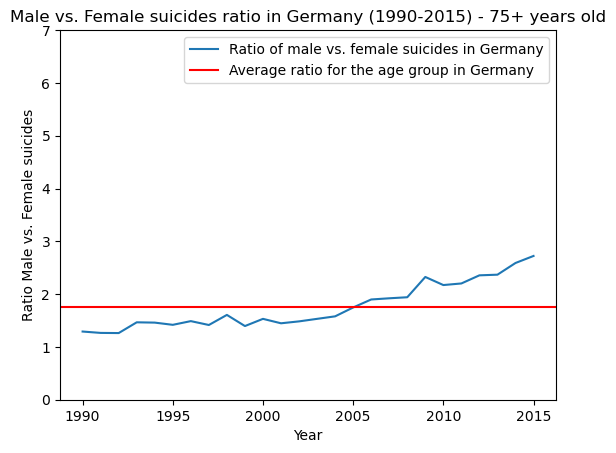

In [63]:
plt.plot(sex_ratio_75.index, sex_ratio_75.ratio, label = "Ratio of male vs. female suicides in Germany")

plt.title("Male vs. Female suicides ratio in Germany (1990-2015) - 75+ years old")
plt.xlabel("Year")
plt.ylabel("Ratio Male vs. Female suicides")
plt.axhline(y = sex_ratio_75.ratio.mean(), color = "red", label = "Average ratio for the age group in Germany")
plt.ylim(ymin=0, ymax=7)
plt.legend()
plt.show()

Wow, this looks interesting. The ratio starts from approximately 1.5 level in 1990 and in fluctuates about this level till 2005. After that it explodes and in 2015 it reaches the 3-level. This means approximately 100% increase for the 25 years time period. For the years to 2005 I think that the ratio stayes relatively low, because of the consequences of the WW2. This age group should consist mainly from women, because most of the German men died during the WW2. Logically the number of male suicides are too few and female suicides (even if they are not so many per women population) are enough high number to keep the ratio low. In the more recent years, for example in 2010, this this group consisted from people born in 1935 and earlier. This means, that these people were 10+ aged during the WW2 and many of them maybe managed to save their lifes, because they were too young to participate in the war.
- Other reasons for the increased levels in the more recent years might be the financial crisis in 2008, which made a lot of people homeless or lose their savings. Each of these can lead to a suicide for a person aged 75+ years.
- Of course other reasons might be physical health or social isolation.

##### 3.3.2 Age group distributionsuicide_data_germany_05_14

In [64]:
suicide_data_germany_05_14_initial = suicide_data_world[(suicide_data_world["country"] == "Germany") & (suicide_data_world["age"] == "05-14 years")]
suicide_data_germany_15_34_initial = suicide_data_world[(suicide_data_world["country"] == "Germany") & (suicide_data_world["age"] == "15-34 years")]
suicide_data_germany_35_54_initial = suicide_data_world[(suicide_data_world["country"] == "Germany") & (suicide_data_world["age"] == "35-54 years")]
suicide_data_germany_55_74_initial = suicide_data_world[(suicide_data_world["country"] == "Germany") & (suicide_data_world["age"] == "55-74 years")]
suicide_data_germany_75_initial = suicide_data_world[(suicide_data_world["country"] == "Germany") & (suicide_data_world["age"] == "75+ years")]

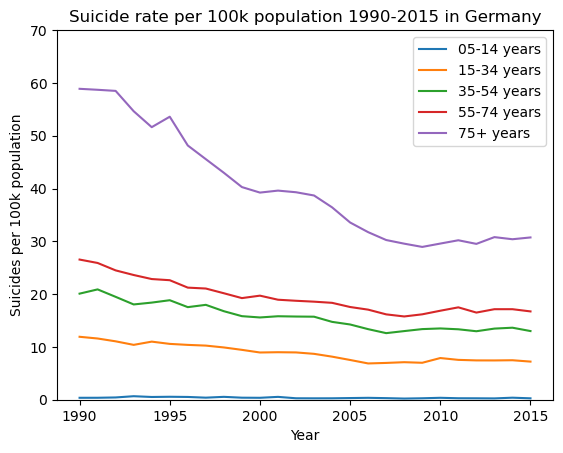

In [65]:
plt.plot(suicide_data_germany_05_14_initial.suicides_per_100k.groupby(suicide_data_germany_05_14_initial.year).mean(), label = "05-14 years")
plt.plot(suicide_data_germany_15_34_initial.suicides_per_100k.groupby(suicide_data_germany_15_34_initial.year).mean(), label = "15-34 years")
plt.plot(suicide_data_germany_35_54_initial.suicides_per_100k.groupby(suicide_data_germany_35_54_initial.year).mean(), label = "35-54 years")
plt.plot(suicide_data_germany_55_74_initial.suicides_per_100k.groupby(suicide_data_germany_55_74_initial.year).mean(), label = "55-74 years")
plt.plot(suicide_data_germany_75_initial.suicides_per_100k.groupby(suicide_data_germany_75_initial.year).mean(), label = "75+ years")

plt.title("Suicide rate per 100k population 1990-2015 in Germany")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k population")
plt.ylim(ymin=0, ymax = 70)
plt.legend()
plt.show()

Pretty interesting, the suicides per 100k population show exactly what I expected to see. Most of the suicides per 100k population are committed by old people (aged 75+ years). The age groups are logically distributed and the least suicides are committed by children (05-14 years old).
The good thing is that we can see a downtrend in all the groups, even if some groups show very slight decrease of the suicide cases. This general trend should have a reason and I think it is **the reunification of Germany in 1990**. Since then a lot have changed and it had a positive influence on the German population in all age groups.
- Economy was boosted and this improved the whole infrastructure, created a lot of new jobs. 
- Social element was also an important factor after so many years of separation between East and West Germany.
- The pension reforms influenced the well being of the elderly people and thus we see a significant decrease in the suicide levels.

Ok, lets see then how will be the distribution to the generations.

##### 3.3.3 Generation

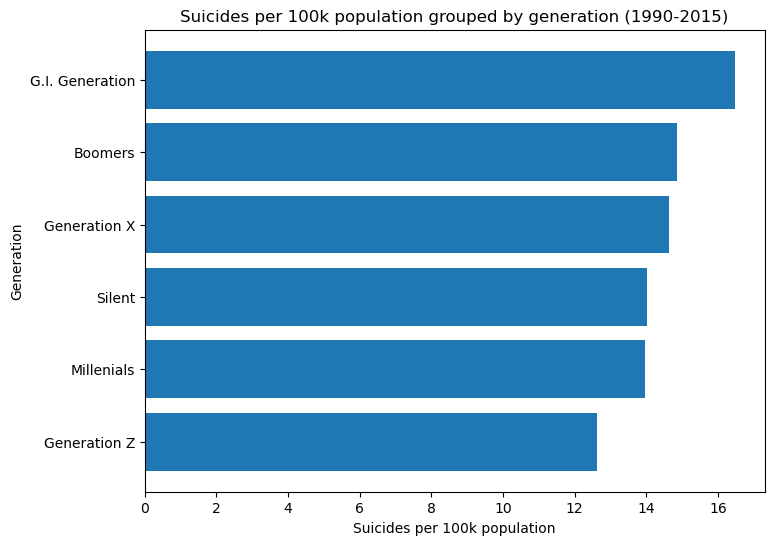

In [66]:
labels = suicide_data_germany.suicide_per_100k_total.groupby(suicide_data_germany.generation).mean().sort_values().index.tolist()
data = suicide_data_germany.suicide_per_100k_total.groupby(suicide_data_germany.generation).mean().sort_values().tolist()

plt.figure(figsize=(8,6))
plt.barh(labels, data)
plt.title("Suicides per 100k population grouped by generation (1990-2015)")
plt.xlabel("Suicides per 100k population")
plt.ylabel("Generation")
plt.show()

Just a slight difference of the suicides per 100k population when we look at the different generations. However, here is something interesting to see. We saw at the chart above that the oldest people commit the most suicides per 100k population. We can expect here that the oldest generation commits the most suicides and is followed by the next oldest generation and so on. Howevern, the "Silent Generation" should be right after the "G.I Generation" as it is the second oldest. But in fact, it has lower levels of suicide. What might be the reason for that? Before I try to find out, I want to check how the suicide rate per 100k population developed over the time.

In [67]:
suicide_data_germany_gi_gen = suicide_data_world[(suicide_data_world["country"] == "Germany") & (suicide_data_world["generation"] == "G.I. Generation")]
suicide_data_germany_silent_gen = suicide_data_world[(suicide_data_world["country"] == "Germany") & (suicide_data_world["generation"] == "Silent")]
suicide_data_germany_boomers_gen = suicide_data_world[(suicide_data_world["country"] == "Germany") & (suicide_data_world["generation"] == "Boomers")]
suicide_data_germany_x_gen = suicide_data_world[(suicide_data_world["country"] == "Germany") & (suicide_data_world["generation"] == "Generation X")]
suicide_data_germany_millenials_gen = suicide_data_world[(suicide_data_world["country"] == "Germany") & (suicide_data_world["generation"] == "Millenials")]
suicide_data_germany_z_gen = suicide_data_world[(suicide_data_world["country"] == "Germany") & (suicide_data_world["generation"] == "Generation Z")]

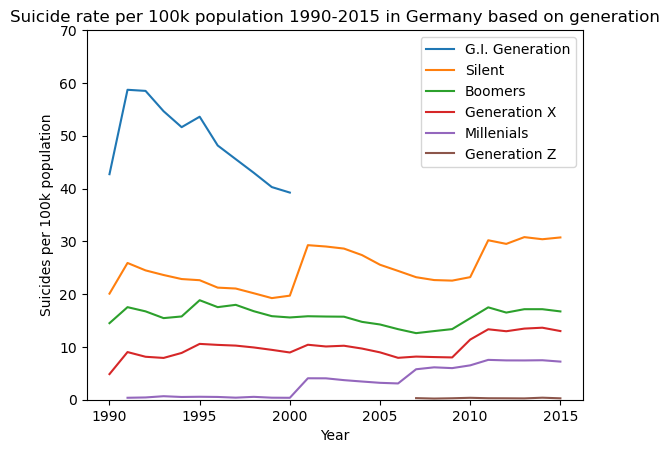

In [68]:
plt.plot(suicide_data_germany_gi_gen.suicides_per_100k.groupby(suicide_data_germany_gi_gen.year).mean(), label = "G.I. Generation")
plt.plot(suicide_data_germany_silent_gen.suicides_per_100k.groupby(suicide_data_germany_silent_gen.year).mean(), label = "Silent")
plt.plot(suicide_data_germany_boomers_gen.suicides_per_100k.groupby(suicide_data_germany_boomers_gen.year).mean(), label = "Boomers")
plt.plot(suicide_data_germany_x_gen.suicides_per_100k.groupby(suicide_data_germany_x_gen.year).mean(), label = "Generation X")
plt.plot(suicide_data_germany_millenials_gen.suicides_per_100k.groupby(suicide_data_germany_millenials_gen.year).mean(), label = "Millenials")
plt.plot(suicide_data_germany_z_gen.suicides_per_100k.groupby(suicide_data_germany_z_gen.year).mean(), label = "Generation Z")

plt.title("Suicide rate per 100k population 1990-2015 in Germany based on generation")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k population")
plt.ylim(ymin=0, ymax = 70)
plt.legend()
plt.show()

Well now the generation are sorted descending. This means the younger generations commit less suicides than older generations per 100k population. On the one side, older populations do not have so many representatives and each suicide has a big influence on the suicide rate. Another interesting thing we can see is that the G.I Generation had a declining suicide rate in the last years up to 2000 year when the generation disappeared. The other generations have rather rising suicide rate in the time. It looks like people commit suicides when they get older.
- ```G.I Generation``` -  a sharp rise exactly after the reunification in Germany in 1990 and gradual decrease in the suicide rates since then. This pattern can be seen for all the age groups. The reunification was in October, but before that there were many demonstrations which can be the reason for the increased suicide rate. However, the gradual declina after that might show that people on the very late age are either not so capable to commit a suicide or they just found the motivation after the reunification or maybe they found some inner motivation like for example to reach 100 years.
- ```Silent``` - These people are one the generation that suffered most after the G.I Generation. They were born shortlz before or during the WW2, were at their best duirng the Cold war, sawed the communism and the democracy, lived during a time when Germany was separated and united. However, one interesting thing to look at is the sharp increase in 2000 year. At first sight there were not some extreme events that might have led to this sharp rise, but if we research a little bit deeper, Germany entered a brief recession in this year and this had a direct influence on the employment rate, financial status and maybe social status for some of the German population. At this time, the Silent generation are already in their 60s or 70s and some people might took the decision to end their life. Another interesting event is the program to compensate Holocaust survivors that were subject to slave labor. ([source](https://en.wikipedia.org/wiki/2001)) Some people from this generation might have participated in the war (even if they were youngs). Such an outcome after they fought against the Jewish during the WW2 was shocking and this might have triggered some of them to commit a suicide, not wanting to live in this Germany/world any more.
- ```Boomers``` - Nothing interesting here, but we can expect some increase in the next years of the suicide rate for the Boomers. In 2015 they were aged about 65 years and entering the 70s might increase the suicidel thoughts for some of them. An interesting jump in the chart hapenned shortly after the 2008 financial crisis. Well, this was definitely the hardest financial crisis in Germany and the first with so big consequences for the German population.
- ```Generation X``` - The same goes also for the Generation X. We can see relatively flat line and an increase shortly after the global financial crisis.
- ```Millenials``` - Here we have something interestig. Very low suicide rate till year 2000 and gradual increase after that with two big jumps in year 2001 and 2007. Well this generation was aged about 5-15 years untill 2000 year, so they were just children and the suicides are rare for this age group as we already saw. In the years 2001 and 2007 they were still teenagers and global crisis like dot.com bubble or the global financial crisis should not have been a reason for committing a suicide. However, even if they are not directly influenced, their parents were. And thig can be a reason for committing a suicide if their parents are stressed or committed a suicide giving an example (as a role model) for their children. 
- ```Generation X``` - this generation keeps very low levels, but they are still children in our dataset. We can expect a rise once they enter the teenager years.

#### 4. West Germany Suicide

##### 4.1 Data acquisition and Data familiarisation

In [69]:
suicide_data_west_germany = pd.read_csv("data/Suicide West Germany.csv", index_col= 0)

Here are the column descriptions:<br>

```Freq``` -> frequency of suicides / number of the cases<br>
```sex``` -> factor indicating the sex of the suicide victim (male, female)<br>
```method``` -> factor indicating the method used for committing the suicide (poison, cookgas, toxicgas, hang, drown)<br>
```age``` -> age of the suicide victim (rounded)<br>
```age.group``` -> the age group of the suicide victim classified into 5 groups<br>
```method2``` -> factor indicating method used (same as method but some levels are merged)<br>

First I wand to get some basic overview about the dataset and check it's shape, types of the records in the columns, missing values and unique values for some of the columns:

In [70]:
suicide_data_west_germany

,Freq,sex,method,age,age.group,method2
1,4,male,poison,10,10-20,poison
2,0,male,cookgas,10,10-20,gas
3,0,male,toxicgas,10,10-20,gas
4,247,male,hang,10,10-20,hang
5,1,male,drown,10,10-20,drown
...,...,...,...,...,...,...
302,4,female,drown,90,70-90,drown
303,0,female,gun,90,70-90,gun
304,2,female,knife,90,70-90,knife
305,7,female,jump,90,70-90,jump


In [71]:
suicide_data_west_germany.shape

(306, 6)

In [72]:
suicide_data_west_germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 1 to 306
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Freq       306 non-null    int64 
 1   sex        306 non-null    object
 2   method     306 non-null    object
 3   age        306 non-null    int64 
 4   age.group  306 non-null    object
 5   method2    306 non-null    object
dtypes: int64(2), object(4)
memory usage: 16.7+ KB


This looks perfect, there aren't any missing values.

In [73]:
suicide_data_west_germany.sex.unique()

array(['male', 'female'], dtype=object)

Back in the past, the sex category was easy, just a male and female.

In [74]:
suicide_data_west_germany.age.unique()

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90],
      dtype=int64)

In [75]:
suicide_data_west_germany["age.group"].unique()

array(['10-20', '25-35', '40-50', '55-65', '70-90'], dtype=object)

Hm this does not look very good. It is not clear whether the categories are complete or there are ages that are not included in any category. The groups are also not equally distributed. I will definitely need to restructure this column.

In [76]:
suicide_data_west_germany.method.unique()

array(['poison', 'cookgas', 'toxicgas', 'hang', 'drown', 'gun', 'knife',
       'jump', 'other'], dtype=object)

In [77]:
suicide_data_west_germany.method2.unique()

array(['poison', 'gas', 'hang', 'drown', 'gun', 'knife', 'jump', 'other'],
      dtype=object)

Ok, then we can start with the data tidying. Here are some of the actions I will first do:
1. I want to reorder the columns so that method and method 2 are one next to the other. 
2. I want to change the name of the column ```"Freq"``` to ```"freqency"``` and ```"age.group"``` to ```"age_group"```.

##### 4.2 Data tidying and cleaning<br>

In [78]:
suicide_data_west_germany = suicide_data_west_germany[["Freq", "sex", "age", "age.group", "method", "method2"]]

In [79]:
suicide_data_west_germany.rename(columns={"Freq":"frequency", "age.group":"age_group"}, inplace = True)

In [80]:
suicide_data_west_germany.head(5)

,frequency,sex,age,age_group,method,method2
1,4,male,10,10-20,poison,poison
2,0,male,10,10-20,cookgas,gas
3,0,male,10,10-20,toxicgas,gas
4,247,male,10,10-20,hang,hang
5,1,male,10,10-20,drown,drown


Another interesting thing is that the age group is not complete. There are ages which are not represented. For this reason, I will create a new column based on multiple conditions in the column ```age```. Then I will drop te old age_group column.

In [81]:
conditions = [
    (suicide_data_west_germany.age <= 14),
    (suicide_data_west_germany.age > 14) & (suicide_data_west_germany.age <= 34),
    (suicide_data_west_germany.age > 34) & (suicide_data_west_germany.age <= 54),
    (suicide_data_west_germany.age > 54) & (suicide_data_west_germany.age <= 74),
    (suicide_data_west_germany.age > 74)
    ]

values = ["05-14 years", "15-34 years", "35-54 years", "55-74 years", "75+ years"]
suicide_data_west_germany["age_group_new"] = np.select(conditions, values)

suicide_data_west_germany.head()

,frequency,sex,age,age_group,method,method2,age_group_new
1,4,male,10,10-20,poison,poison,05-14 years
2,0,male,10,10-20,cookgas,gas,05-14 years
3,0,male,10,10-20,toxicgas,gas,05-14 years
4,247,male,10,10-20,hang,hang,05-14 years
5,1,male,10,10-20,drown,drown,05-14 years


In [82]:
suicide_data_west_germany.drop(columns = "age_group", inplace = True)

Perfect, now lets analyse the data and visualise it.
##### 4.3 Data visualization<br>
##### 4.3.1 Suicide method distribution<br>

Ok, first I want to see the distribution of the suicides grouped by method. Аfter that I would like to do the same for males and females and see whether there are anz tremendous differences in the methods that men and women use.

In [83]:
suicides_grouped_by_method = suicide_data_west_germany.frequency.groupby(suicide_data_west_germany.method).sum()

In [84]:
suicides_grouped_by_method

method
cookgas       253
drown        2649
gun          3118
hang        20377
jump         2845
knife         937
other        3284
poison      17565
toxicgas     2154
Name: frequency, dtype: int64

In [85]:
suicides_grouped_by_method/suicide_data_west_germany.frequency.sum()*100

method
cookgas      0.475725
drown        4.981009
gun          5.862886
hang        38.315596
jump         5.349554
knife        1.761874
other        6.175022
poison      33.028092
toxicgas     4.050243
Name: frequency, dtype: float64

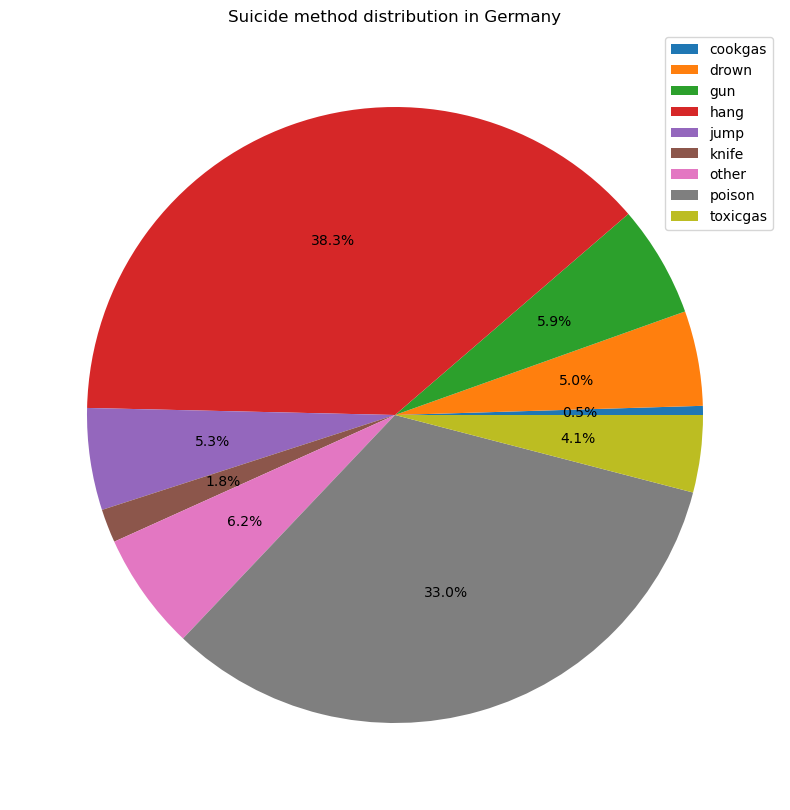

In [86]:
plt.pie(suicides_grouped_by_method, autopct="%1.1f%%")
plt.legend(labels = suicides_grouped_by_method.index, loc = "upper right")
plt.title("Suicide method distribution in Germany")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [87]:
suicide_data_west_germany_male = suicide_data_west_germany[suicide_data_west_germany.sex == "male"]
suicide_data_west_germany_female = suicide_data_west_germany[suicide_data_west_germany.sex == "female"]

In [88]:
suicides_grouped_by_method_male = suicide_data_west_germany_male.frequency.groupby(suicide_data_west_germany_male.method).sum()
suicides_grouped_by_method_female = suicide_data_west_germany_female.frequency.groupby(suicide_data_west_germany_female.method).sum()

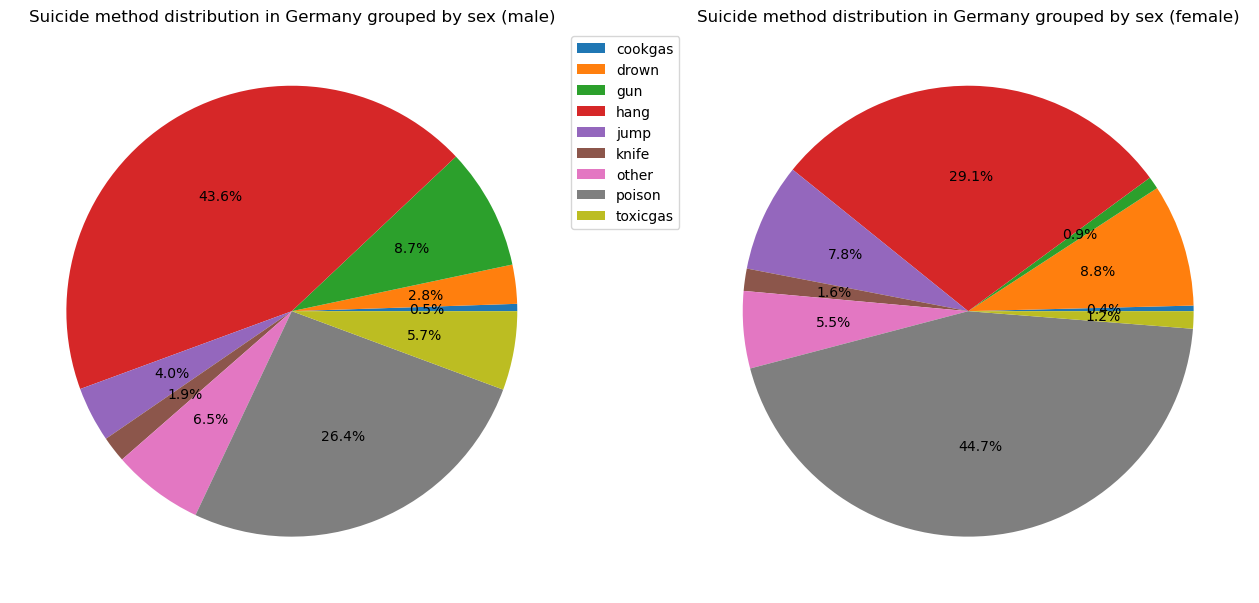

In [89]:
fig = plt.figure(figsize=(16,10))

ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(suicides_grouped_by_method_male, autopct="%1.1f%%")
plt.title("Suicide method distribution in Germany grouped by sex (male)")

ax1 = plt.subplot2grid((1, 2), (0, 1))
plt.pie(suicides_grouped_by_method_female, autopct="%1.1f%%")
plt.title("Suicide method distribution in Germany grouped by sex (female)")
plt.legend(labels = suicides_grouped_by_method.index, bbox_to_anchor=(-0, 1))
plt.show()

Looking at the charts, I can see that both men and women prefer hanging or posioning when it comes to commit suicide. However, men prefer hanging more and women prefer posioning, but in both cases these two methods represent approximately 70% (or more) of all suicides. So my focus will definitely be there. About the other methods, I can see that men prefer to use a gun or toxicgas to end their life while women prefer to jump from somewhere or get drawn.
Well, lets think about it step by step what might be the reason for this discrepancy.
1. Why men chose hanging and not posioning and women vice versa?
- Hanging vs. Poison: My explanation for this is that men take ultimate decision and want to commit the suicide quick and with no chance for intervention, if possible. For this reason they prefer mostly hanging. On the other side women try poisoning themselves with the hope that someone will try go help, to intervate. Of course both sex groups have different type of representatives. In the male group there are men who do not want to suicide, but just to show intention and thats why they use the poison method. In the female group there are women, who really want to commit the suicide and not just to pretend, so thez use the hanging method then.
- Gun vs. Drown: The same goes here. Using a firearm to commit a suicide results in maybe 99.99% success, immeadiate and quick, with no (or extremely small) chance for intervention. On the other side, drowning is not always so secure method for committin a suicide. The person can tie himself not very tight and rethink while he still has the chance to save his life. 
- Toxicgas vs. jump: Well absolutely the same story here. Toxicgas (especially Hellium) produces a quick and painless death and if used appropriately there is almost no chance for intervention. On the other side, jumping from a building can always "go wrong" and the person might stays alive, but with broken legs, arms etc.

Well, as a short conclusion, men seem to really "want" to commit the suicide and use more hard methods which give just a little chance to fail. On the other side, women prefer soft methods, because they are uncertain whether they really want to commit the suicide or just to indicate that they need support. Of course, there are always exceptions in both groups.

The dataset that I am uisng for this analysis is pretty old, so I managed to fine more recent data ([Table 2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2569832/)) and it would be interesting to make a comparison whether the method distribution is the same or at least similar. Some interesting changes:
- Males use the hanging method even more often (54.9%), firearms (10.4%) and jumping (7.8%). On the other side, posioning and drowning are being neglected. There is a new method in this report - moving object. Well, back in the past it was almost impossible to use this method, but in the current time of fast trains, cars etc. this is also a quick and secure method to commit a suicide. What does all this mean? Well, men still count on quick and secure methods to commit a suicide which means that they took the final decision and there is no way back.
- Females on the other side, increased significantly the usage of the hanging and the jumping method and decreased the usage of the poisoning method (slightly) and the drowning method. Firearme stay very insignificant method for the females. This means that women still count on more insecure methods with prevention possibility, but the increased share of the hanging method tells us that more and more women take the final decision and commit the suicide with no thoughts of survival chance.





##### 4.3.2 Age group distribution<br>

In [90]:
age_groups = suicide_data_west_germany.age_group_new.unique()

In [91]:
suicide_data_west_germany_poison = suicide_data_west_germany[suicide_data_west_germany["method"] == "poison"]
suicide_data_west_germany_cookgas = suicide_data_west_germany[suicide_data_west_germany["method"] == "cookgas"]
suicide_data_west_germany_toxicgas = suicide_data_west_germany[suicide_data_west_germany["method"] == "toxicgas"]
suicide_data_west_germany_hang = suicide_data_west_germany[suicide_data_west_germany["method"] == "hang"]
suicide_data_west_germany_drown = suicide_data_west_germany[suicide_data_west_germany["method"] == "drown"]
suicide_data_west_germany_gun = suicide_data_west_germany[suicide_data_west_germany["method"] == "gun"]
suicide_data_west_germany_knife = suicide_data_west_germany[suicide_data_west_germany["method"] == "knife"]
suicide_data_west_germany_jump = suicide_data_west_germany[suicide_data_west_germany["method"] == "jump"]
suicide_data_west_germany_other = suicide_data_west_germany[suicide_data_west_germany["method"] == "other"]

In [92]:
suicide_data_west_germany_poison_data = suicide_data_west_germany_poison.frequency.groupby(suicide_data_west_germany_poison.age_group_new).sum().tolist()
suicide_data_west_germany_cookgas_data = suicide_data_west_germany_cookgas.frequency.groupby(suicide_data_west_germany_cookgas.age_group_new).sum().tolist()
suicide_data_west_germany_toxicgas_data = suicide_data_west_germany_toxicgas.frequency.groupby(suicide_data_west_germany_toxicgas.age_group_new).sum().tolist()
suicide_data_west_germany_hang_data = suicide_data_west_germany_hang.frequency.groupby(suicide_data_west_germany_hang.age_group_new).sum().tolist()
suicide_data_west_germany_drown_data = suicide_data_west_germany_drown.frequency.groupby(suicide_data_west_germany_drown.age_group_new).sum().tolist()
suicide_data_west_germany_gun_data = suicide_data_west_germany_gun.frequency.groupby(suicide_data_west_germany_gun.age_group_new).sum().tolist()
suicide_data_west_germany_knife_data = suicide_data_west_germany_knife.frequency.groupby(suicide_data_west_germany_knife.age_group_new).sum().tolist()
suicide_data_west_germany_jump_data = suicide_data_west_germany_jump.frequency.groupby(suicide_data_west_germany_jump.age_group_new).sum().tolist()
suicide_data_west_germany_other_data = suicide_data_west_germany_other.frequency.groupby(suicide_data_west_germany_other.age_group_new).sum().tolist()

In [93]:
data_preparation_bar_chart = pd.DataFrame(
    {"Age Groups": age_groups,
     "Poison": suicide_data_west_germany_poison_data,
     "Cookgas": suicide_data_west_germany_cookgas_data,
     "Toxicgas": suicide_data_west_germany_toxicgas_data,
     "Hang": suicide_data_west_germany_hang_data,
     "Drown": suicide_data_west_germany_drown_data,
     "Gun": suicide_data_west_germany_gun_data,
     "Knife": suicide_data_west_germany_knife_data,
     "Jump": suicide_data_west_germany_jump_data,
     "Other": suicide_data_west_germany_other_data
    })


In [94]:
data_preparation_bar_chart

,Age Groups,Poison,Cookgas,Toxicgas,Hang,Drown,Gun,Knife,Jump,Other
0,05-14 years,32,0,3,267,1,18,1,16,6
1,15-34 years,4738,96,883,3245,297,1118,174,714,1218
2,35-54 years,6495,85,1020,6967,752,1244,326,803,1217
3,55-74 years,4863,49,233,7473,1220,628,328,909,718
4,75+ years,1437,23,15,2425,379,110,108,403,125


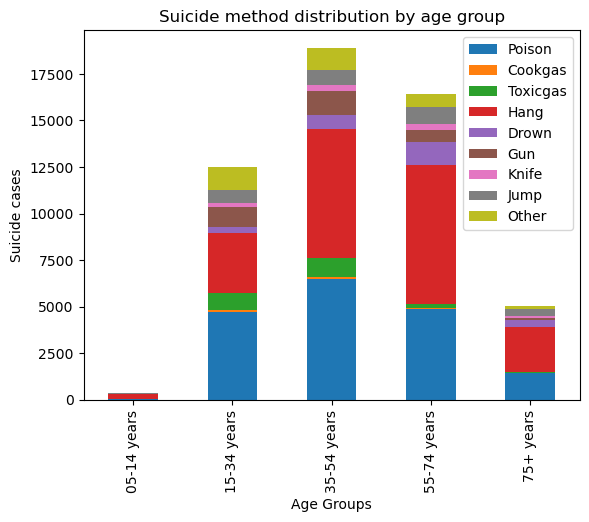

In [95]:
data_preparation_bar_chart.plot(x="Age Groups", kind="bar", stacked=True,
        title="Suicide method distribution by age group", ylabel = "Suicide cases")
plt.show()

Ok, I see relatively the same distribution at all ages with small changes. However there are some interesting things:
- Hanging method share rises with the time and reaches it's peak in the 55-74 years old group. It is the most preferred method from this group maybe because old people already took the final decision and want to do it with no survival chance.
- Younger people on the other side..prefer soft methods like poison. This method might not lead to a direct death and there is some chance for prevention. Maybe younger people are in doubt and still not sure whether they want to commit a suicide or just attract someone's attention or seek support.
- The middle group (35-54 years old), representing the most suicide cases, is also interesting. Poisoning and Hanging represent approximately 70% of the suicides at this group. The gun is also preferred from this age group. What I think is worth mentioning is that this age group is balanced when it comes to the poisoning and hanging method usage. The younger group preferred the poison method and the older group preferred the hanging method, but 35-54 years old preferred both methods (almost equally).

Now lets split out dataset into male and female and do the same method visualisation.

In [96]:
suicide_data_west_germany_poison_male = suicide_data_west_germany[(suicide_data_west_germany["method"] == "poison")&(suicide_data_west_germany["sex"] == "male")]
suicide_data_west_germany_cookgas_male = suicide_data_west_germany[(suicide_data_west_germany["method"] == "cookgas")&(suicide_data_west_germany["sex"] == "male")]
suicide_data_west_germany_toxicgas_male = suicide_data_west_germany[(suicide_data_west_germany["method"] == "toxicgas")&(suicide_data_west_germany["sex"] == "male")]
suicide_data_west_germany_hang_male = suicide_data_west_germany[(suicide_data_west_germany["method"] == "hang")&(suicide_data_west_germany["sex"] == "male")]
suicide_data_west_germany_drown_male = suicide_data_west_germany[(suicide_data_west_germany["method"] == "drown")&(suicide_data_west_germany["sex"] == "male")]
suicide_data_west_germany_gun_male = suicide_data_west_germany[(suicide_data_west_germany["method"] == "gun")&(suicide_data_west_germany["sex"] == "male")]
suicide_data_west_germany_knife_male = suicide_data_west_germany[(suicide_data_west_germany["method"] == "knife")&(suicide_data_west_germany["sex"] == "male")]
suicide_data_west_germany_jump_male = suicide_data_west_germany[(suicide_data_west_germany["method"] == "jump")&(suicide_data_west_germany["sex"] == "male")]
suicide_data_west_germany_other_male = suicide_data_west_germany[(suicide_data_west_germany["method"] == "other")&(suicide_data_west_germany["sex"] == "male")]

suicide_data_west_germany_poison_female = suicide_data_west_germany[(suicide_data_west_germany["method"] == "poison")&(suicide_data_west_germany["sex"] == "female")]
suicide_data_west_germany_cookgas_female = suicide_data_west_germany[(suicide_data_west_germany["method"] == "cookgas")&(suicide_data_west_germany["sex"] == "female")]
suicide_data_west_germany_toxicgas_female = suicide_data_west_germany[(suicide_data_west_germany["method"] == "toxicgas")&(suicide_data_west_germany["sex"] == "female")]
suicide_data_west_germany_hang_female = suicide_data_west_germany[(suicide_data_west_germany["method"] == "hang")&(suicide_data_west_germany["sex"] == "female")]
suicide_data_west_germany_drown_female = suicide_data_west_germany[(suicide_data_west_germany["method"] == "drown")&(suicide_data_west_germany["sex"] == "female")]
suicide_data_west_germany_gun_female = suicide_data_west_germany[(suicide_data_west_germany["method"] == "gun")&(suicide_data_west_germany["sex"] == "female")]
suicide_data_west_germany_knife_female = suicide_data_west_germany[(suicide_data_west_germany["method"] == "knife")&(suicide_data_west_germany["sex"] == "female")]
suicide_data_west_germany_jump_female = suicide_data_west_germany[(suicide_data_west_germany["method"] == "jump")&(suicide_data_west_germany["sex"] == "female")]
suicide_data_west_germany_other_female = suicide_data_west_germany[(suicide_data_west_germany["method"] == "other")&(suicide_data_west_germany["sex"] == "female")]

In [97]:
suicide_data_west_germany_poison_data_male = suicide_data_west_germany_poison_male.frequency.groupby(suicide_data_west_germany_poison_male.age_group_new).sum().tolist()
suicide_data_west_germany_cookgas_data_male = suicide_data_west_germany_cookgas_male.frequency.groupby(suicide_data_west_germany_cookgas_male.age_group_new).sum().tolist()
suicide_data_west_germany_toxicgas_data_male = suicide_data_west_germany_toxicgas_male.frequency.groupby(suicide_data_west_germany_toxicgas_male.age_group_new).sum().tolist()
suicide_data_west_germany_hang_data_male = suicide_data_west_germany_hang_male.frequency.groupby(suicide_data_west_germany_hang_male.age_group_new).sum().tolist()
suicide_data_west_germany_drown_data_male = suicide_data_west_germany_drown_male.frequency.groupby(suicide_data_west_germany_drown_male.age_group_new).sum().tolist()
suicide_data_west_germany_gun_data_male = suicide_data_west_germany_gun_male.frequency.groupby(suicide_data_west_germany_gun_male.age_group_new).sum().tolist()
suicide_data_west_germany_knife_data_male = suicide_data_west_germany_knife_male.frequency.groupby(suicide_data_west_germany_knife_male.age_group_new).sum().tolist()
suicide_data_west_germany_jump_data_male = suicide_data_west_germany_jump_male.frequency.groupby(suicide_data_west_germany_jump_male.age_group_new).sum().tolist()
suicide_data_west_germany_other_data_male = suicide_data_west_germany_other_male.frequency.groupby(suicide_data_west_germany_other_male.age_group_new).sum().tolist()

suicide_data_west_germany_poison_data_female = suicide_data_west_germany_poison_female.frequency.groupby(suicide_data_west_germany_poison_female.age_group_new).sum().tolist()
suicide_data_west_germany_cookgas_data_female = suicide_data_west_germany_cookgas_female.frequency.groupby(suicide_data_west_germany_cookgas_female.age_group_new).sum().tolist()
suicide_data_west_germany_toxicgas_data_female = suicide_data_west_germany_toxicgas_female.frequency.groupby(suicide_data_west_germany_toxicgas_female.age_group_new).sum().tolist()
suicide_data_west_germany_hang_data_female = suicide_data_west_germany_hang_female.frequency.groupby(suicide_data_west_germany_hang_female.age_group_new).sum().tolist()
suicide_data_west_germany_drown_data_female = suicide_data_west_germany_drown_female.frequency.groupby(suicide_data_west_germany_drown_female.age_group_new).sum().tolist()
suicide_data_west_germany_gun_data_female = suicide_data_west_germany_gun_female.frequency.groupby(suicide_data_west_germany_gun_female.age_group_new).sum().tolist()
suicide_data_west_germany_knife_data_female = suicide_data_west_germany_knife_female.frequency.groupby(suicide_data_west_germany_knife_female.age_group_new).sum().tolist()
suicide_data_west_germany_jump_data_female = suicide_data_west_germany_jump_female.frequency.groupby(suicide_data_west_germany_jump_female.age_group_new).sum().tolist()
suicide_data_west_germany_other_data_female = suicide_data_west_germany_other_female.frequency.groupby(suicide_data_west_germany_other_female.age_group_new).sum().tolist()



In [98]:
data_preparation_bar_chart_male = pd.DataFrame(
    {"Age Groups": age_groups,
     "Poison": suicide_data_west_germany_poison_data_male,
     "Cookgas": suicide_data_west_germany_cookgas_data_male,
     "Toxicgas": suicide_data_west_germany_toxicgas_data_male,
     "Hang": suicide_data_west_germany_hang_data_male,
     "Drown": suicide_data_west_germany_drown_data_male,
     "Gun": suicide_data_west_germany_gun_data_male,
     "Knife": suicide_data_west_germany_knife_data_male,
     "Jump": suicide_data_west_germany_jump_data_male,
     "Other": suicide_data_west_germany_other_data_male
    })


In [99]:
data_preparation_bar_chart_female = pd.DataFrame(
    {"Age Groups": age_groups,
     "Poison": suicide_data_west_germany_poison_data_female,
     "Cookgas": suicide_data_west_germany_cookgas_data_female,
     "Toxicgas": suicide_data_west_germany_toxicgas_data_female,
     "Hang": suicide_data_west_germany_hang_data_female,
     "Drown": suicide_data_west_germany_drown_data_female,
     "Gun": suicide_data_west_germany_gun_data_female,
     "Knife": suicide_data_west_germany_knife_data_female,
     "Jump": suicide_data_west_germany_jump_data_female,
     "Other": suicide_data_west_germany_other_data_female
    })


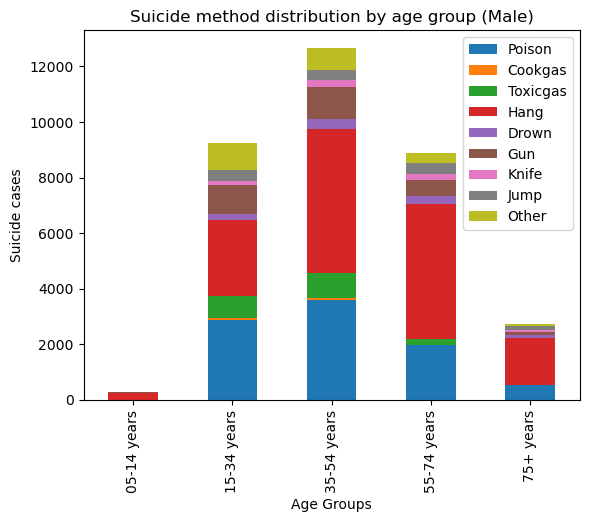

In [100]:
data_preparation_bar_chart_male.plot(x="Age Groups", kind="bar", stacked=True,
        title="Suicide method distribution by age group (Male)", ylabel = "Suicide cases")
plt.show()

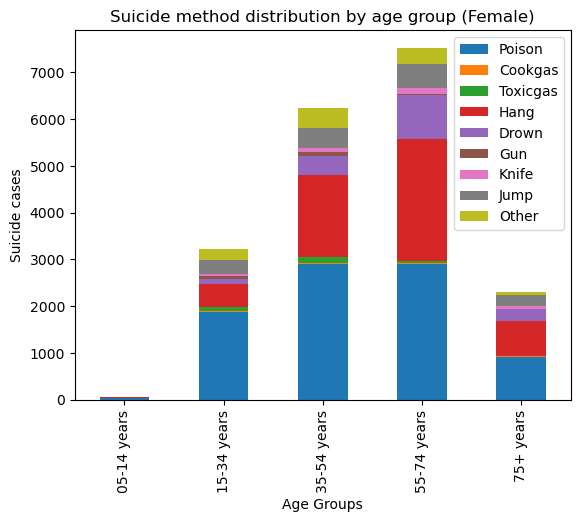

In [101]:
data_preparation_bar_chart_female.plot(x="Age Groups", kind="bar", stacked=True,
        title="Suicide method distribution by age group (Female)", ylabel = "Suicide cases")
plt.show()

Well, here I can see the differences. In the first chart, males and females compensated each other and I could not see any clear trend or difference. Now after we splitted them into 2 spearate charts, I can clearly see some interesting things:
1. Men definitely prefer hanging as a suicide method at all ages, and use much more often gun or toxicgas to commit a suicide. Each of these methods guarantees a quick death, which means that men act very decisive. The most suicides are done at the middle age 35-54 years. I think main reasons for that should be:
- Family/relationship problems: At this age men should already be married and problems in the family might lead to a suicide. On the other side, if the person is not in realtionship, he might be upset or in depression because of that which also increases the suicide risk.
- Financial problems: People at this age must have any career orientation and earn good money to guarantee a good life quality of their families. However, sometimes this might go wrong and this can be a good reason for committing a suicide.
- Drug/Alcohol/Gambling abuse: all three can easily lead to addiction and ruin the life and the relationship with relatives and family.

2. Women on the other side commit much more suicides at age 55-74 years. At younger ages the ratio male suicides vs. female suicides is approaching 3:1 or 2:1, but at later age this ratio decreases almost to 1:1. However, women prefer to use methods like posion, drowning and jumping. These methods are not so decisive and might lead to a survival case. This means, that many women might just need some more support and want to attract the attention of relatives/spouse. There are some reasons why women commit a suicide at later ages: 
- First of all, the beauty of the woman is important, but at age of 55-74, well, the woman is not so attractive anymore. Of course, there are a lot of women who live thanks to it's beauty and once they are not so attractive, the chance of divorce or lack of attention is pretty high, which leads often to a suicide.
- Another good reason is loss of someone beloved. At this age it happens oft that men die first and the women must live alone then. A lot of women want to avoid this and commit a suicide shortly after that.

Here it comes the question..can we or someone make something prior the suicide and save the person's life? If yes, then how can we find out potential people with suicidal thoughs? 
Well, one possible method is thanks to the messages they write. Some people giv special signs that they think about the scenario to commit a suicide. Once they are being detected, a possible solution is to start sending them ads for suicide prevention. I will try to create a model that predicts such cases. So let's see.

#### 5. Suicide detection per text message<br>
##### 5.1 Data acquisition and Data familiarisation<br>

Data can be found here:
https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch?select=Suicide_Detection.csv

Unfortunately, the dataset is too large so I can not upload it alltogether.

The first think I want to do is to read my dataset and check the basics again like shape, missing values etc.

In [102]:
# suicide_text_messages = pd.read_csv("data/Suicide_Detection_text_messages.csv")
suicide_text_messages.head(5)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [103]:
suicide_text_messages.shape

(232074, 3)

In [104]:
suicide_text_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


Well, we have in total 3 columns, but I will need to do some work to prepare them for modeling. First, I will drop the column ```0``` and leave the standard column for indexes, because the original column ```0``` skips some numbers. After that I will replace the values in ```class``` column replacing the actual values with 0 and 1.

##### 5.2 Data tidying and cleaning

In [105]:
suicide_text_messages.drop(columns=["Unnamed: 0"], axis=1, inplace = True)

In [106]:
suicide_text_messages["class"] = suicide_text_messages["class"].replace(["suicide", "non-suicide"],[1,0])
suicide_text_messages.head(5)

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1


Ok, now it looks like my dataset is tidy and ready for modelling. I will first extract all the messages in a separate list so that i can train my model after that.

In [107]:
text_messages_list = suicide_text_messages.text.values.tolist()

In [108]:
#to see all symbols and letters
#Counter("\n".join(text_messages_list)).most_common()

#to see just a few, because there are a lot of symbols, letters, emoticons etc.
Counter("\n".join(text_messages_list)).most_common(30)

[(' ', 30296434),
 ('e', 14136215),
 ('t', 11078331),
 ('o', 9392384),
 ('a', 9160217),
 ('n', 8417606),
 ('i', 7806413),
 ('s', 7047612),
 ('h', 5825421),
 ('r', 5607636),
 ('l', 5498437),
 ('d', 4829961),
 ('m', 3843995),
 ('u', 3458538),
 ('y', 3325314),
 ('g', 2851306),
 ('f', 2604624),
 ('w', 2591246),
 ('c', 2530259),
 ('I', 2200596),
 ('p', 2084808),
 ('.', 2001141),
 ('b', 1904150),
 ('k', 1452354),
 ('v', 1445285),
 (',', 1041034),
 ('\n', 1025020),
 ("'", 872050),
 ('j', 343776),
 ('’', 343258)]

Nice, the Counter showed us the known system Etaoin shrdlu and the letters from our messages coincide very good with it. Ok, I will use now the TF-IDF in order to fit my data. I am also adding an additional setting for the ngram range, so that I get not just the separate words, but also all the expressions with up to 4 words in it.
#### 6. Modeling<br>
##### 6.1 Model training<br>

In [109]:
tfidf = TfidfVectorizer(ngram_range=(1,4))

In [110]:
X = tfidf.fit_transform(text_messages_list)

In [111]:
y = suicide_text_messages["class"].tolist()

Perfect, now I fit the data and want to check the vocabulary to be sure that expressions with up to 4 words are also in it.

In [112]:
tfidf.vocabulary_

{'ex': 8932501,
 'wife': 32688713,
 'threatening': 29172187,
 'suiciderecently': 26586718,
 'left': 16077277,
 'my': 18625669,
 'for': 9880418,
 'good': 11250237,
 'because': 3915763,
 'she': 24652799,
 'has': 11942607,
 'cheated': 5748364,
 'on': 20856308,
 'me': 17422399,
 'twice': 30640346,
 'and': 1543050,
 'lied': 16190433,
 'to': 29432223,
 'so': 25281785,
 'much': 18513446,
 'that': 27099027,
 'have': 12059295,
 'decided': 7007224,
 'refuse': 23546282,
 'go': 11069891,
 'back': 3480548,
 'her': 12664875,
 'as': 2999723,
 'of': 20242253,
 'few': 9579181,
 'days': 6893131,
 'ago': 864685,
 'began': 4204716,
 'suicide': 26537827,
 'tirelessly': 29418965,
 'spent': 25907590,
 'these': 28463977,
 'paat': 21842011,
 'talking': 26841524,
 'out': 21597768,
 'it': 14718247,
 'keeps': 15589210,
 'hesitating': 12862338,
 'wants': 31531391,
 'believe': 4312686,
 'll': 16726576,
 'come': 6041916,
 'know': 15749826,
 'lot': 16957579,
 'people': 22114338,
 'will': 32701088,
 'threaten': 291703

Looks got. Now I want to test my model and see how accurate is it. I will use the Bernoulli Naive Bayes for a classificator, because my target values are binary (0 and 1).

In [113]:
text_classifier = BernoulliNB()

So first I will fit the data:

In [114]:
text_classifier.fit(X,y)

BernoulliNB()

Then I will use the fitted model to predict tha same data based on what it has learnt:

In [115]:
predictions = text_classifier.predict(X)

Now we have already the predicted data and can measure the accuracy score of our model to check how many messages were correctly predicted:
##### 6.2 Model results<br>

In [116]:
print(accuracy_score(y, predictions))

0.7882658117669364


Well, this is a good score, however we need to consider the fact that I did not split the dataset into train and test data. Doing this, the score should decrease, trying to predict new (unseen) data. I want to check the classification report for more details:

In [117]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.71      0.99      0.82    116037
           1       0.98      0.59      0.74    116037

    accuracy                           0.79    232074
   macro avg       0.84      0.79      0.78    232074
weighted avg       0.84      0.79      0.78    232074



Hm, interesting, we do have 98% precision for suicides, which means that 98% from the predicted suicides are true, but in the same time we have only 59% recall score, which means that 59% of the actual suicides were correctly predicted and the rest was not. This is in fact not very satisfying, because it misses too much potential suicides. I want to check also in numbers with the confusion matrix.

In [118]:
print(confusion_matrix(y, predictions))

[[114741   1296]
 [ 47842  68195]]


Well I have 114741 correctly predictes 0 and 68195 correctly predicted 1. Furthermore, I see 1296 predicted for suicides, but there we did not have suicide. The biggest problem however is that I have 47842 cases that my model predicted "no suicide" and the person commited a suicide. This is extremely bad for my model, because this is the most important metric in this case.

#### 7. Limitations and further improvements<br>

In this project there are some limitations which can be used for improvement of future works:
- **Data** - the dataset I used included only data till 2015 and there were missing years for many countries. Thus our analysis will never be complete, because we might use insights from certain years that are missing in the dataset currently. Furhtermore, the datased used for the suicide methods includes data gathered in 1979. It would be interesting to find more recent data and search for some patterns then.
- **Deeper research for some features** - in this work I focused on few of the features provided. Future work may focus on HDI, USD per capita and other features.
- **Very basic model** - only one classificator was tested, only one dataset as a source and the dataset was not splitted into train and test data. All these can be optimized in order to be developed a comprehensive model with very good prediction score on new (unseen) data. In any case the benefit of such a model will definitely be large, because a lot of young people end their lifes too early. If such people can be successfully identified and supported, the world shoud get a better place.

#### 8. Conclusion<br>

To conclude briefly this work, I should say that the general trend of the suicides (per 100k population) is moving in the right direction and is declining year by year or at least based on the dataset I analysed. However, there are countries, where the suicide rate stays extremely high in comparison to the work and even if there are logical explanations about this, a national prevention programm is needed.<br>
Furthermore, we saw how men use more "secure" methods when they commit a suicide which means that they are decisive and want to do it. It is much harder to identify such cases and support them successfully. The main reason for this is that men avoid sharing their thoughs and expressing their emotions and just act. This should be also considered when a prediction model is created.<br>
On the other side, women use more "insecure" methods when committing a suicide, which means that they are not completely sure whether they want to do it or just need to attract sommeone's attention. These cases are also not so easy for identifying, but definitely it is easier to interact and offer support. The reason for this is that women express their emotions and share much more with their family and relatives. <br>
In any case, suicide was identified by the governments and different organisations and measures were already taken. There organisations in almost every country, working also very actively online, there are national programms in some countries and this all seems to work so far.